In [1]:
#importamos librerias necesarias para la manipulación
import pandas as pd
import numpy as np

In [2]:
# Prerequisite: Installs the latest version of Ludwig in the Colab environment
#%pip uninstall -y tensorflow --quiet
%pip install ludwig --quiet
%pip install ludwig[viz] --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 7.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.6/39.6 MB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 682.2/682.2 kB 58.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.8/80.8 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 61.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.1/98.1 kB 15.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.0/232.0 kB 30.0 MB/s eta 0:00:00
 

In [3]:
#Cargamos base de datos en formato CSV
#Cargamos base de datos en formato CSV
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [35]:
df=pd.read_csv('/content/drive/MyDrive/negativa_positiva - Hoja 1.csv')

In [36]:
df

,TITULO,DESCRIPCION,CATEGORIA,DUMMY
0,¡Preocupante! Ocupación hotelera en Colombia s...,De acuerdo con el Sistema de Información Hotel...,NEGATIVA,-1
1,Dumek: “No puedo decir que a Cartagena la saqu...,"Dumek Turbay, que resultó siendo el gran vence...",NEGATIVA,-1
2,Reportan baja de operaciones en 4 de las 10 ru...,"De enero a septiembre de este año, cuatro de l...",NEGATIVA,-1
3,BM advierte que pagos de la deuda privan de di...,"Brasil, Argentina, México, Colombia y Ecuador ...",NEGATIVA,-1
4,La Cumbre del Clima podría promover la expansi...,El documento final de la COP28 en Dubái da pie...,NEGATIVA,-1
...,...,...,...,...
410,Los costos están impulsando cambios en los háb...,El turismo en Colombia está en alza a nivel in...,POSITIVA,1
411,La nueva aerolínea que solicitó operar en Colo...,"\r\nUna nueva aerolínea, ALMA, solicita operar...",POSITIVA,1
412,Nuestra meta es llegar a todos los rincones tu...,"Civitatis, plataforma de actividades turística...",POSITIVA,1
413,Dan detalles del plan para reactivar la econom...,El presidente Gustavo Petro anunció la prepara...,POSITIVA,1


In [37]:
# Para contar cuántas veces aparece cada valor en la columna CATEGORIA
conteo = df['CATEGORIA'].value_counts()

print(conteo)

CATEGORIA
POSITIVA    271
NEGATIVA    144
Name: count, dtype: int64


In [38]:
from sklearn.model_selection import train_test_split

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [39]:
# Guardar los conjuntos de datos
train_df.to_csv('train_data.csv', index=False)
test_df.to_csv('test_data.csv', index=False)

In [40]:
#Token Hugging face acceso
import getpass
#import locale; locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')
import logging
import os

#from ludwig.api import LudwigModel


os.environ["HUGGING_FACE_HUB_TOKEN"] = getpass.getpass("Token:")
assert os.environ["HUGGING_FACE_HUB_TOKEN"]

Token:··········


In [41]:
from torchtext.transforms import SentencePieceTokenizer

/usr/local/lib/python3.10/dist-packages/torchtext/transforms.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT TORCHTEXT STATUS /!\ 
Torchtext is deprecated and the last released version will be 0.18 (this one). You can silence this warning by calling the following at the beginnign of your scripts: `import torchtext; torchtext.disable_torchtext_deprecation_warning()`
  warnings.warn(torchtext._TORCHTEXT_DEPRECATION_MSG)
/usr/local/lib/python3.10/dist-packages/torchtext/data/__init__.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT TORCHTEXT STATUS /!\ 
Torchtext is deprecated and the last released version will be 0.18 (this one). You can silence this warning by calling the following at the beginnign of your scripts: `import torchtext; torchtext.disable_torchtext_deprecation_warning()`
  warnings.warn(torchtext._TORCHTEXT_DEPRECATION_MSG)
/usr/local/lib/python3.10/dist-packages/torchtext/utils.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT TORCHTEXT STATUS /!\ 
Torchtext is deprecated and

In [42]:
import logging
from ludwig.api import LudwigModel

# Configuración ajustada
config = {
    "input_features": [
        {
            "name": "DESCRIPCION ",
            "type": "text",
            "preprocessing": {"tokenizer":"hf_tokenizer", "cache_encoder_embeddings": True},
            "encoder": {
                "type": "auto_transformer",
                "pretrained_model_name_or_path": "distilbert/distilbert-base-multilingual-cased",
                 "trainable": True,
                "regularizer": {
                    "type": "l2",
                    "weight": 0.001  # Regularización L2 aplicada al encoder
                }
            }
        },
    ],
    "output_features": [
        {
            "name": "CATEGORIA",
            "type": "binary",
            "calibration": True
        }
    ],
    "preprocessing": {
        "oversample_minority": 0.5
    },
    "adapter": {  # Corregido el espacio adicional en el nombre de la clave
        "type": "lora",
        "r": 8,
        "dropout": 0.05,
        "target_modules": None,  # Corregido de Null a None
        "use_rslora": False,
        "use_dora": False,
        "alpha": 15,
        "pretrained_adapter_weights": None,  # Corregido de Null a None
        "postprocessor": {
            "merge_adapter_into_base_model": False,
            "progressbar": False,
            "bias_type": "none"  # Corregido para que el valor sea una cadena
        }
    },
    "trainer": {
        "epochs": 40,
        "learning_rate": 0.0001,
        "optimizer": {"type": "adamw"},
        "batch_size": 2,
        "early_stop": 30,
    }
}

In [43]:
# Crea una instancia del modelo Ludwig con la configuración
model = LudwigModel(config, logging_level=logging.INFO)

In [44]:
train_stats,pred,out = model.train(dataset=train_df)

INFO:ludwig.utils.print_utils:
INFO:ludwig.utils.print_utils:╒════════════════════════╕
INFO:ludwig.utils.print_utils:│ EXPERIMENT DESCRIPTION │
INFO:ludwig.utils.print_utils:╘════════════════════════╛
INFO:ludwig.utils.print_utils:
INFO:ludwig.api:╒══════════════════╤═════════════════════════════════════════════════════════════════════════════════════════╕
│ Experiment name  │ api_experiment                                                                          │
├──────────────────┼─────────────────────────────────────────────────────────────────────────────────────────┤
│ Model name       │ run                                                                                     │
├──────────────────┼─────────────────────────────────────────────────────────────────────────────────────────┤
│ Output directory │ /content/results/api_experiment_run                                                     │
├──────────────────┼─────────────────────────────────────────────────────────────────

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/466 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

INFO:ludwig.utils.tokenizers:Loaded TorchText implementation of distilbert/distilbert-base-multilingual-cased tokenizer
INFO:ludwig.features.text_feature:Max length of feature 'DESCRIPCION ': 295 (without start and stop symbols)
INFO:ludwig.features.text_feature:Max sequence length is 256 for feature 'DESCRIPCION '
INFO:ludwig.utils.tokenizers:Loaded TorchText implementation of distilbert/distilbert-base-multilingual-cased tokenizer
INFO:ludwig.data.preprocessing:Building dataset: DONE
INFO:ludwig.data.cache.manager:Writing preprocessed training set cache to /content/91c18460205211efb4590242ac1c000c.training.hdf5
INFO:ludwig.data.cache.manager:Writing preprocessed validation set cache to /content/91c18460205211efb4590242ac1c000c.validation.hdf5
INFO:ludwig.data.cache.manager:Writing preprocessed test set cache to /content/91c18460205211efb4590242ac1c000c.test.hdf5
INFO:ludwig.data.cache.manager:Writing train set metadata to /content/91c18460205211efb4590242ac1c000c.meta.json
INFO:ludwi

model.safetensors:   0%|          | 0.00/542M [00:00<?, ?B/s]

INFO:ludwig.trainers.trainer:Tuning batch size...
INFO:ludwig.utils.batch_size_tuner:Tuning batch size...
INFO:ludwig.utils.batch_size_tuner:Exploring batch_size=1
INFO:ludwig.utils.batch_size_tuner:Throughput at batch_size=1: 82.13496 samples/s
INFO:ludwig.utils.batch_size_tuner:Exploring batch_size=2
INFO:ludwig.utils.batch_size_tuner:Throughput at batch_size=2: 91.61470 samples/s
INFO:ludwig.utils.batch_size_tuner:Exploring batch_size=4
INFO:ludwig.utils.batch_size_tuner:Throughput at batch_size=4: 110.65962 samples/s
INFO:ludwig.utils.batch_size_tuner:Exploring batch_size=8
INFO:ludwig.utils.batch_size_tuner:Throughput at batch_size=8: 138.27642 samples/s
INFO:ludwig.utils.batch_size_tuner:Exploring batch_size=16
INFO:ludwig.utils.batch_size_tuner:Throughput at batch_size=16: 145.00494 samples/s
INFO:ludwig.utils.batch_size_tuner:Exploring batch_size=32
INFO:ludwig.utils.batch_size_tuner:Throughput at batch_size=32: 140.68207 samples/s
INFO:ludwig.utils.batch_size_tuner:Throughput 

Training:   2%|▏         | 115/4640 [00:11<07:20, 10.28it/s, loss=0]

INFO:ludwig.data.batcher.random_access:Last batch in epoch only has 1 sample and will be dropped.
INFO:ludwig.data.batcher.random_access:Last batch in epoch only has 1 sample and will be dropped.
INFO:ludwig.data.batcher.random_access:Last batch in epoch only has 1 sample and will be dropped.


Training:   2%|▏         | 115/4640 [00:23<07:20, 10.28it/s, loss=37.1]

INFO:ludwig.trainers.trainer:
Running evaluation for step: 116, epoch: 1


Evaluation test : 100%|██████████| 5/5 [00:00<00:00, 10.75it/s]

INFO:ludwig.trainers.trainer:Evaluation took 0.9267s

INFO:ludwig.utils.metrics_printed_table:╒═══════════════╤═════════╤══════════════╤═════════╕
│               │   train │   validation │    test │
╞═══════════════╪═════════╪══════════════╪═════════╡
│ accuracy      │  0.5000 │       0.6970 │  0.7121 │
├───────────────┼─────────┼──────────────┼─────────┤
│ loss          │ 37.1335 │      17.7340 │ 27.2879 │
├───────────────┼─────────┼──────────────┼─────────┤
│ precision     │  0.0000 │       0.0000 │  0.0000 │
├───────────────┼─────────┼──────────────┼─────────┤
│ recall        │  0.0000 │       0.0000 │  0.0000 │
├───────────────┼─────────┼──────────────┼─────────┤
│ roc_auc       │  1.0000 │       0.6283 │  0.7581 │
├───────────────┼─────────┼──────────────┼─────────┤
│ specificity   │  1.0000 │       1.0000 │  1.0000 │
├───────────────┼─────────┼──────────────┼─────────┤
│ combined_loss │ 37.1335 │      17.7340 │ 27.2879 │
╘═══════════════╧═════════╧══════════════╧═════════╛
INFO:


Training:   5%|▍         | 229/4640 [01:37<07:03, 10.41it/s, loss=51.8]

INFO:ludwig.data.batcher.random_access:Last batch in epoch only has 1 sample and will be dropped.
INFO:ludwig.data.batcher.random_access:Last batch in epoch only has 1 sample and will be dropped.
INFO:ludwig.data.batcher.random_access:Last batch in epoch only has 1 sample and will be dropped.


Training:   5%|▌         | 232/4640 [01:53<2:31:33,  2.06s/it, loss=30.4]

INFO:ludwig.trainers.trainer:
Running evaluation for step: 232, epoch: 2


Evaluation test : 100%|██████████| 5/5 [00:00<00:00, 10.62it/s]

INFO:ludwig.trainers.trainer:Evaluation took 0.7569s

INFO:ludwig.utils.metrics_printed_table:╒═══════════════╤═════════╤══════════════╤═════════╕
│               │   train │   validation │    test │
╞═══════════════╪═════════╪══════════════╪═════════╡
│ accuracy      │  0.5000 │       0.5152 │  0.4242 │
├───────────────┼─────────┼──────────────┼─────────┤
│ loss          │ 19.3715 │      42.4330 │ 68.2395 │
├───────────────┼─────────┼──────────────┼─────────┤
│ precision     │  1.0000 │       0.3636 │  0.3208 │
├───────────────┼─────────┼──────────────┼─────────┤
│ recall        │  0.3333 │       0.8000 │  0.8947 │
├───────────────┼─────────┼──────────────┼─────────┤
│ roc_auc       │  0.3333 │       0.5783 │  0.5868 │
├───────────────┼─────────┼──────────────┼─────────┤
│ specificity   │  1.0000 │       0.3913 │  0.2340 │
├───────────────┼─────────┼──────────────┼─────────┤
│ combined_loss │ 19.3715 │      42.4330 │ 68.2395 │
╘═══════════════╧═════════╧══════════════╧═════════╛
INFO:


Training:   7%|▋         | 344/4640 [02:45<06:59, 10.24it/s, loss=0]   

INFO:ludwig.data.batcher.random_access:Last batch in epoch only has 1 sample and will be dropped.
INFO:ludwig.data.batcher.random_access:Last batch in epoch only has 1 sample and will be dropped.
INFO:ludwig.data.batcher.random_access:Last batch in epoch only has 1 sample and will be dropped.


Training:   8%|▊         | 348/4640 [03:18<4:00:13,  3.36s/it, loss=20.2]

INFO:ludwig.trainers.trainer:
Running evaluation for step: 348, epoch: 3


Evaluation test : 100%|██████████| 5/5 [00:00<00:00, 10.69it/s]

INFO:ludwig.trainers.trainer:Evaluation took 0.7283s

INFO:ludwig.utils.metrics_printed_table:╒═══════════════╤═════════╤══════════════╤════════╕
│               │   train │   validation │   test │
╞═══════════════╪═════════╪══════════════╪════════╡
│ accuracy      │  0.8333 │       0.6970 │ 0.7121 │
├───────────────┼─────────┼──────────────┼────────┤
│ loss          │  6.7486 │       6.3385 │ 9.4127 │
├───────────────┼─────────┼──────────────┼────────┤
│ precision     │  0.0000 │       0.0000 │ 0.0000 │
├───────────────┼─────────┼──────────────┼────────┤
│ recall        │  0.0000 │       0.0000 │ 0.0000 │
├───────────────┼─────────┼──────────────┼────────┤
│ roc_auc       │  0.4000 │       0.7043 │ 0.7816 │
├───────────────┼─────────┼──────────────┼────────┤
│ specificity   │  1.0000 │       1.0000 │ 1.0000 │
├───────────────┼─────────┼──────────────┼────────┤
│ combined_loss │  6.7486 │       6.3385 │ 9.4127 │
╘═══════════════╧═════════╧══════════════╧════════╛
INFO:ludwig.trainers.t


Training:  10%|▉         | 460/4640 [04:12<06:45, 10.32it/s, loss=0]

INFO:ludwig.data.batcher.random_access:Last batch in epoch only has 1 sample and will be dropped.
INFO:ludwig.data.batcher.random_access:Last batch in epoch only has 1 sample and will be dropped.
INFO:ludwig.data.batcher.random_access:Last batch in epoch only has 1 sample and will be dropped.


Training:  10%|█         | 464/4640 [04:37<2:29:58,  2.15s/it, loss=0]

INFO:ludwig.trainers.trainer:
Running evaluation for step: 464, epoch: 4


Evaluation test : 100%|██████████| 5/5 [00:00<00:00, 10.56it/s]

INFO:ludwig.trainers.trainer:Evaluation took 0.7684s

INFO:ludwig.utils.metrics_printed_table:╒═══════════════╤═════════╤══════════════╤═════════╕
│               │   train │   validation │    test │
╞═══════════════╪═════════╪══════════════╪═════════╡
│ accuracy      │  0.8750 │       0.6970 │  0.7121 │
├───────────────┼─────────┼──────────────┼─────────┤
│ loss          │ 10.3288 │      12.0539 │ 16.8684 │
├───────────────┼─────────┼──────────────┼─────────┤
│ precision     │  0.0000 │       0.0000 │  0.0000 │
├───────────────┼─────────┼──────────────┼─────────┤
│ recall        │  0.0000 │       0.0000 │  0.0000 │
├───────────────┼─────────┼──────────────┼─────────┤
│ roc_auc       │  0.1429 │       0.6543 │  0.7268 │
├───────────────┼─────────┼──────────────┼─────────┤
│ specificity   │  1.0000 │       1.0000 │  1.0000 │
├───────────────┼─────────┼──────────────┼─────────┤
│ combined_loss │ 10.3288 │      12.0539 │ 16.8684 │
╘═══════════════╧═════════╧══════════════╧═════════╛
INFO:


Training:  12%|█▏        | 574/4640 [05:16<06:33, 10.34it/s, loss=1.37e-13]

INFO:ludwig.data.batcher.random_access:Last batch in epoch only has 1 sample and will be dropped.
INFO:ludwig.data.batcher.random_access:Last batch in epoch only has 1 sample and will be dropped.
INFO:ludwig.data.batcher.random_access:Last batch in epoch only has 1 sample and will be dropped.


Training:  12%|█▎        | 580/4640 [05:27<47:37,  1.42it/s, loss=10.6]  

INFO:ludwig.trainers.trainer:
Running evaluation for step: 580, epoch: 5


Evaluation test : 100%|██████████| 5/5 [00:00<00:00, 10.52it/s]

INFO:ludwig.trainers.trainer:Evaluation took 0.7704s

INFO:ludwig.utils.metrics_printed_table:╒═══════════════╤═════════╤══════════════╤════════╕
│               │   train │   validation │   test │
╞═══════════════╪═════════╪══════════════╪════════╡
│ accuracy      │  0.4000 │       0.6970 │ 0.7121 │
├───────────────┼─────────┼──────────────┼────────┤
│ loss          │  5.9704 │       5.1836 │ 4.7953 │
├───────────────┼─────────┼──────────────┼────────┤
│ precision     │  0.0000 │       0.0000 │ 0.0000 │
├───────────────┼─────────┼──────────────┼────────┤
│ recall        │  0.0000 │       0.0000 │ 0.0000 │
├───────────────┼─────────┼──────────────┼────────┤
│ roc_auc       │  0.5833 │       0.7152 │ 0.8343 │
├───────────────┼─────────┼──────────────┼────────┤
│ specificity   │  0.6667 │       1.0000 │ 1.0000 │
├───────────────┼─────────┼──────────────┼────────┤
│ combined_loss │  5.9704 │       5.1836 │ 4.7953 │
╘═══════════════╧═════════╧══════════════╧════════╛
INFO:ludwig.trainers.t


Training:  15%|█▍        | 689/4640 [06:23<06:26, 10.24it/s, loss=6.31]  

INFO:ludwig.data.batcher.random_access:Last batch in epoch only has 1 sample and will be dropped.
INFO:ludwig.data.batcher.random_access:Last batch in epoch only has 1 sample and will be dropped.
INFO:ludwig.data.batcher.random_access:Last batch in epoch only has 1 sample and will be dropped.


Training:  15%|█▌        | 696/4640 [06:53<1:32:19,  1.40s/it, loss=4.77e-7]

INFO:ludwig.trainers.trainer:
Running evaluation for step: 696, epoch: 6


Evaluation test : 100%|██████████| 5/5 [00:00<00:00, 10.55it/s]

INFO:ludwig.trainers.trainer:Evaluation took 0.7562s

INFO:ludwig.utils.metrics_printed_table:╒═══════════════╤═════════╤══════════════╤════════╕
│               │   train │   validation │   test │
╞═══════════════╪═════════╪══════════════╪════════╡
│ accuracy      │  0.5000 │       0.6970 │ 0.7121 │
├───────────────┼─────────┼──────────────┼────────┤
│ loss          │  5.1067 │       3.7060 │ 5.7834 │
├───────────────┼─────────┼──────────────┼────────┤
│ precision     │  0.3333 │       0.0000 │ 0.0000 │
├───────────────┼─────────┼──────────────┼────────┤
│ recall        │  0.5000 │       0.0000 │ 0.0000 │
├───────────────┼─────────┼──────────────┼────────┤
│ roc_auc       │  0.5938 │       0.1696 │ 0.1489 │
├───────────────┼─────────┼──────────────┼────────┤
│ specificity   │  0.5000 │       1.0000 │ 1.0000 │
├───────────────┼─────────┼──────────────┼────────┤
│ combined_loss │  5.1067 │       3.7060 │ 5.7834 │
╘═══════════════╧═════════╧══════════════╧════════╛
INFO:ludwig.trainers.t


Training:  17%|█▋        | 805/4640 [07:29<06:28,  9.86it/s, loss=7.88]

INFO:ludwig.data.batcher.random_access:Last batch in epoch only has 1 sample and will be dropped.
INFO:ludwig.data.batcher.random_access:Last batch in epoch only has 1 sample and will be dropped.
INFO:ludwig.data.batcher.random_access:Last batch in epoch only has 1 sample and will be dropped.


Training:  17%|█▋        | 811/4640 [07:53<1:19:47,  1.25s/it, loss=0]   

INFO:ludwig.trainers.trainer:
Running evaluation for step: 812, epoch: 7


Evaluation test : 100%|██████████| 5/5 [00:00<00:00, 10.72it/s]

INFO:ludwig.trainers.trainer:Evaluation took 0.7433s

INFO:ludwig.utils.metrics_printed_table:╒═══════════════╤═════════╤══════════════╤════════╕
│               │   train │   validation │   test │
╞═══════════════╪═════════╪══════════════╪════════╡
│ accuracy      │  0.7143 │       0.7879 │ 0.8030 │
├───────────────┼─────────┼──────────────┼────────┤
│ loss          │ 11.6451 │       0.4711 │ 0.4816 │
├───────────────┼─────────┼──────────────┼────────┤
│ precision     │  0.0000 │       0.7143 │ 0.7143 │
├───────────────┼─────────┼──────────────┼────────┤
│ recall        │  0.0000 │       0.5000 │ 0.5263 │
├───────────────┼─────────┼──────────────┼────────┤
│ roc_auc       │  0.6000 │       0.8217 │ 0.8645 │
├───────────────┼─────────┼──────────────┼────────┤
│ specificity   │  1.0000 │       0.9130 │ 0.9149 │
├───────────────┼─────────┼──────────────┼────────┤
│ combined_loss │ 11.6451 │       0.4711 │ 0.4816 │
╘═══════════════╧═════════╧══════════════╧════════╛
INFO:ludwig.trainers.t


Training:  20%|█▉        | 920/4640 [08:51<05:57, 10.41it/s, loss=0]

INFO:ludwig.data.batcher.random_access:Last batch in epoch only has 1 sample and will be dropped.
INFO:ludwig.data.batcher.random_access:Last batch in epoch only has 1 sample and will be dropped.
INFO:ludwig.data.batcher.random_access:Last batch in epoch only has 1 sample and will be dropped.


Training:  20%|██        | 928/4640 [09:16<42:56,  1.44it/s, loss=0.0262]  

INFO:ludwig.trainers.trainer:
Running evaluation for step: 928, epoch: 8


Evaluation test : 100%|██████████| 5/5 [00:00<00:00, 10.86it/s]

INFO:ludwig.trainers.trainer:Evaluation took 0.7301s

INFO:ludwig.utils.metrics_printed_table:╒═══════════════╤═════════╤══════════════╤════════╕
│               │   train │   validation │   test │
╞═══════════════╪═════════╪══════════════╪════════╡
│ accuracy      │  0.8750 │       0.8182 │ 0.7727 │
├───────────────┼─────────┼──────────────┼────────┤
│ loss          │  4.1081 │       1.2167 │ 1.5979 │
├───────────────┼─────────┼──────────────┼────────┤
│ precision     │  1.0000 │       0.6667 │ 0.5667 │
├───────────────┼─────────┼──────────────┼────────┤
│ recall        │  0.5000 │       0.8000 │ 0.8947 │
├───────────────┼─────────┼──────────────┼────────┤
│ roc_auc       │  1.0000 │       0.8522 │ 0.8729 │
├───────────────┼─────────┼──────────────┼────────┤
│ specificity   │  1.0000 │       0.8261 │ 0.7234 │
├───────────────┼─────────┼──────────────┼────────┤
│ combined_loss │  4.1081 │       1.2167 │ 1.5979 │
╘═══════════════╧═════════╧══════════════╧════════╛
INFO:ludwig.trainers.t


Training:  22%|██▏       | 1035/4640 [10:08<05:51, 10.27it/s, loss=0]

INFO:ludwig.data.batcher.random_access:Last batch in epoch only has 1 sample and will be dropped.
INFO:ludwig.data.batcher.random_access:Last batch in epoch only has 1 sample and will be dropped.
INFO:ludwig.data.batcher.random_access:Last batch in epoch only has 1 sample and will be dropped.


Training:  22%|██▎       | 1044/4640 [10:35<44:17,  1.35it/s, loss=0]

INFO:ludwig.trainers.trainer:
Running evaluation for step: 1044, epoch: 9


Evaluation test : 100%|██████████| 5/5 [00:00<00:00, 10.74it/s]

INFO:ludwig.trainers.trainer:Evaluation took 0.7338s

INFO:ludwig.utils.metrics_printed_table:╒═══════════════╤═════════╤══════════════╤═════════╕
│               │   train │   validation │    test │
╞═══════════════╪═════════╪══════════════╪═════════╡
│ accuracy      │  0.8333 │       0.7879 │  0.7879 │
├───────────────┼─────────┼──────────────┼─────────┤
│ loss          │  1.8728 │      17.7332 │ 24.6472 │
├───────────────┼─────────┼──────────────┼─────────┤
│ precision     │  0.6000 │       1.0000 │  1.0000 │
├───────────────┼─────────┼──────────────┼─────────┤
│ recall        │  0.7500 │       0.3000 │  0.2632 │
├───────────────┼─────────┼──────────────┼─────────┤
│ roc_auc       │  0.9375 │       0.7000 │  0.7032 │
├───────────────┼─────────┼──────────────┼─────────┤
│ specificity   │  0.8571 │       1.0000 │  1.0000 │
├───────────────┼─────────┼──────────────┼─────────┤
│ combined_loss │  1.8728 │      17.7332 │ 24.6472 │
╘═══════════════╧═════════╧══════════════╧═════════╛
INFO:


Training:  25%|██▍       | 1150/4640 [11:13<05:38, 10.31it/s, loss=0]

INFO:ludwig.data.batcher.random_access:Last batch in epoch only has 1 sample and will be dropped.
INFO:ludwig.data.batcher.random_access:Last batch in epoch only has 1 sample and will be dropped.
INFO:ludwig.data.batcher.random_access:Last batch in epoch only has 1 sample and will be dropped.


Training:  25%|██▍       | 1159/4640 [11:31<27:02,  2.14it/s, loss=0]   

INFO:ludwig.trainers.trainer:
Running evaluation for step: 1160, epoch: 10


Evaluation test : 100%|██████████| 5/5 [00:00<00:00, 10.71it/s]

INFO:ludwig.trainers.trainer:Evaluation took 0.7340s

INFO:ludwig.utils.metrics_printed_table:╒═══════════════╤═════════╤══════════════╤════════╕
│               │   train │   validation │   test │
╞═══════════════╪═════════╪══════════════╪════════╡
│ accuracy      │  0.9000 │       0.8182 │ 0.8939 │
├───────────────┼─────────┼──────────────┼────────┤
│ loss          │  0.7019 │       3.0223 │ 1.0363 │
├───────────────┼─────────┼──────────────┼────────┤
│ precision     │  1.0000 │       0.6667 │ 0.8000 │
├───────────────┼─────────┼──────────────┼────────┤
│ recall        │  0.5000 │       0.8000 │ 0.8421 │
├───────────────┼─────────┼──────────────┼────────┤
│ roc_auc       │  1.0000 │       0.8609 │ 0.9087 │
├───────────────┼─────────┼──────────────┼────────┤
│ specificity   │  1.0000 │       0.8261 │ 0.9149 │
├───────────────┼─────────┼──────────────┼────────┤
│ combined_loss │  0.7019 │       3.0223 │ 1.0363 │
╘═══════════════╧═════════╧══════════════╧════════╛
INFO:ludwig.trainers.t


Training:  27%|██▋       | 1265/4640 [12:25<05:45,  9.76it/s, loss=0]

INFO:ludwig.data.batcher.random_access:Last batch in epoch only has 1 sample and will be dropped.
INFO:ludwig.data.batcher.random_access:Last batch in epoch only has 1 sample and will be dropped.
INFO:ludwig.data.batcher.random_access:Last batch in epoch only has 1 sample and will be dropped.


Training:  28%|██▊       | 1276/4640 [12:58<41:27,  1.35it/s, loss=0]  

INFO:ludwig.trainers.trainer:
Running evaluation for step: 1276, epoch: 11


Evaluation test : 100%|██████████| 5/5 [00:00<00:00, 10.81it/s]

INFO:ludwig.trainers.trainer:Evaluation took 0.7299s

INFO:ludwig.utils.metrics_printed_table:╒═══════════════╤═════════╤══════════════╤════════╕
│               │   train │   validation │   test │
╞═══════════════╪═════════╪══════════════╪════════╡
│ accuracy      │  1.0000 │       0.7576 │ 0.8939 │
├───────────────┼─────────┼──────────────┼────────┤
│ loss          │  0.0000 │      18.6688 │ 6.2574 │
├───────────────┼─────────┼──────────────┼────────┤
│ precision     │  1.0000 │       0.6250 │ 0.8750 │
├───────────────┼─────────┼──────────────┼────────┤
│ recall        │  1.0000 │       0.5000 │ 0.7368 │
├───────────────┼─────────┼──────────────┼────────┤
│ roc_auc       │  1.0000 │       0.8630 │ 0.8970 │
├───────────────┼─────────┼──────────────┼────────┤
│ specificity   │  1.0000 │       0.8696 │ 0.9574 │
├───────────────┼─────────┼──────────────┼────────┤
│ combined_loss │  0.0000 │      18.6688 │ 6.2574 │
╘═══════════════╧═════════╧══════════════╧════════╛
INFO:ludwig.trainers.t


Training:  30%|██▉       | 1380/4640 [13:37<05:11, 10.47it/s, loss=7.87e-14]

INFO:ludwig.data.batcher.random_access:Last batch in epoch only has 1 sample and will be dropped.
INFO:ludwig.data.batcher.random_access:Last batch in epoch only has 1 sample and will be dropped.
INFO:ludwig.data.batcher.random_access:Last batch in epoch only has 1 sample and will be dropped.


Training:  30%|███       | 1392/4640 [13:57<11:22,  4.76it/s, loss=8.88e-13]

INFO:ludwig.trainers.trainer:
Running evaluation for step: 1392, epoch: 12


Evaluation test : 100%|██████████| 5/5 [00:00<00:00, 10.56it/s]

INFO:ludwig.trainers.trainer:Evaluation took 0.7699s

INFO:ludwig.utils.metrics_printed_table:╒═══════════════╤═════════╤══════════════╤════════╕
│               │   train │   validation │   test │
╞═══════════════╪═════════╪══════════════╪════════╡
│ accuracy      │  1.0000 │       0.8182 │ 0.8939 │
├───────────────┼─────────┼──────────────┼────────┤
│ loss          │  0.0000 │      11.0372 │ 7.7709 │
├───────────────┼─────────┼──────────────┼────────┤
│ precision     │  1.0000 │       0.7500 │ 0.8750 │
├───────────────┼─────────┼──────────────┼────────┤
│ recall        │  1.0000 │       0.6000 │ 0.7368 │
├───────────────┼─────────┼──────────────┼────────┤
│ roc_auc       │  1.0000 │       0.7435 │ 0.8690 │
├───────────────┼─────────┼──────────────┼────────┤
│ specificity   │  1.0000 │       0.9130 │ 0.9574 │
├───────────────┼─────────┼──────────────┼────────┤
│ combined_loss │  0.0000 │      11.0372 │ 7.7709 │
╘═══════════════╧═════════╧══════════════╧════════╛
INFO:ludwig.trainers.t


Training:  32%|███▏      | 1495/4640 [14:36<05:03, 10.35it/s, loss=0]

INFO:ludwig.data.batcher.random_access:Last batch in epoch only has 1 sample and will be dropped.
INFO:ludwig.data.batcher.random_access:Last batch in epoch only has 1 sample and will be dropped.
INFO:ludwig.data.batcher.random_access:Last batch in epoch only has 1 sample and will be dropped.


Training:  32%|███▏      | 1507/4640 [14:44<09:18,  5.61it/s, loss=0]   

INFO:ludwig.trainers.trainer:
Running evaluation for step: 1508, epoch: 13


Evaluation test : 100%|██████████| 5/5 [00:00<00:00, 10.36it/s]

INFO:ludwig.trainers.trainer:Evaluation took 0.7773s

INFO:ludwig.utils.metrics_printed_table:╒═══════════════╤═════════╤══════════════╤════════╕
│               │   train │   validation │   test │
╞═══════════════╪═════════╪══════════════╪════════╡
│ accuracy      │  1.0000 │       0.7576 │ 0.8939 │
├───────────────┼─────────┼──────────────┼────────┤
│ loss          │  0.0000 │      11.1509 │ 6.4175 │
├───────────────┼─────────┼──────────────┼────────┤
│ precision     │  1.0000 │       0.6250 │ 0.8333 │
├───────────────┼─────────┼──────────────┼────────┤
│ recall        │  1.0000 │       0.5000 │ 0.7895 │
├───────────────┼─────────┼──────────────┼────────┤
│ roc_auc       │  1.0000 │       0.8413 │ 0.9104 │
├───────────────┼─────────┼──────────────┼────────┤
│ specificity   │  1.0000 │       0.8696 │ 0.9362 │
├───────────────┼─────────┼──────────────┼────────┤
│ combined_loss │  0.0000 │      11.1509 │ 6.4175 │
╘═══════════════╧═════════╧══════════════╧════════╛
INFO:ludwig.trainers.t


Training:  35%|███▍      | 1609/4640 [15:23<04:49, 10.47it/s, loss=0]

INFO:ludwig.data.batcher.random_access:Last batch in epoch only has 1 sample and will be dropped.
INFO:ludwig.data.batcher.random_access:Last batch in epoch only has 1 sample and will be dropped.
INFO:ludwig.data.batcher.random_access:Last batch in epoch only has 1 sample and will be dropped.


Training:  35%|███▌      | 1624/4640 [15:35<09:50,  5.11it/s, loss=0]

INFO:ludwig.trainers.trainer:
Running evaluation for step: 1624, epoch: 14


Evaluation test : 100%|██████████| 5/5 [00:00<00:00, 10.74it/s]

INFO:ludwig.trainers.trainer:Evaluation took 0.7345s

INFO:ludwig.utils.metrics_printed_table:╒═══════════════╤═════════╤══════════════╤════════╕
│               │   train │   validation │   test │
╞═══════════════╪═════════╪══════════════╪════════╡
│ accuracy      │  1.0000 │       0.7879 │ 0.8939 │
├───────────────┼─────────┼──────────────┼────────┤
│ loss          │  0.0012 │      39.7233 │ 5.9572 │
├───────────────┼─────────┼──────────────┼────────┤
│ precision     │  1.0000 │       0.6154 │ 0.8000 │
├───────────────┼─────────┼──────────────┼────────┤
│ recall        │  1.0000 │       0.8000 │ 0.8421 │
├───────────────┼─────────┼──────────────┼────────┤
│ roc_auc       │  1.0000 │       0.8696 │ 0.9194 │
├───────────────┼─────────┼──────────────┼────────┤
│ specificity   │  1.0000 │       0.7826 │ 0.9149 │
├───────────────┼─────────┼──────────────┼────────┤
│ combined_loss │  0.0012 │      39.7233 │ 5.9572 │
╘═══════════════╧═════════╧══════════════╧════════╛
INFO:ludwig.trainers.t


Training:  37%|███▋      | 1725/4640 [16:40<04:42, 10.30it/s, loss=0]

INFO:ludwig.data.batcher.random_access:Last batch in epoch only has 1 sample and will be dropped.
INFO:ludwig.data.batcher.random_access:Last batch in epoch only has 1 sample and will be dropped.
INFO:ludwig.data.batcher.random_access:Last batch in epoch only has 1 sample and will be dropped.


Training:  38%|███▊      | 1740/4640 [17:03<07:53,  6.12it/s, loss=1.4e-45]

INFO:ludwig.trainers.trainer:
Running evaluation for step: 1740, epoch: 15


Evaluation test : 100%|██████████| 5/5 [00:00<00:00, 10.60it/s]

INFO:ludwig.trainers.trainer:Evaluation took 0.7772s

INFO:ludwig.utils.metrics_printed_table:╒═══════════════╤═════════╤══════════════╤═════════╕
│               │   train │   validation │    test │
╞═══════════════╪═════════╪══════════════╪═════════╡
│ accuracy      │  0.9000 │       0.7879 │  0.8030 │
├───────────────┼─────────┼──────────────┼─────────┤
│ loss          │  3.0123 │      52.6926 │ 11.0583 │
├───────────────┼─────────┼──────────────┼─────────┤
│ precision     │  1.0000 │       0.6000 │  0.6071 │
├───────────────┼─────────┼──────────────┼─────────┤
│ recall        │  0.5000 │       0.9000 │  0.8947 │
├───────────────┼─────────┼──────────────┼─────────┤
│ roc_auc       │  0.9583 │       0.8717 │  0.8180 │
├───────────────┼─────────┼──────────────┼─────────┤
│ specificity   │  1.0000 │       0.7391 │  0.7660 │
├───────────────┼─────────┼──────────────┼─────────┤
│ combined_loss │  3.0123 │      52.6926 │ 11.0583 │
╘═══════════════╧═════════╧══════════════╧═════════╛
INFO:


Training:  40%|███▉      | 1840/4640 [18:21<04:52,  9.58it/s, loss=0]

INFO:ludwig.data.batcher.random_access:Last batch in epoch only has 1 sample and will be dropped.
INFO:ludwig.data.batcher.random_access:Last batch in epoch only has 1 sample and will be dropped.
INFO:ludwig.data.batcher.random_access:Last batch in epoch only has 1 sample and will be dropped.


Training:  40%|████      | 1856/4640 [18:46<11:26,  4.05it/s, loss=0]

INFO:ludwig.trainers.trainer:
Running evaluation for step: 1856, epoch: 16


Evaluation test : 100%|██████████| 5/5 [00:00<00:00, 10.58it/s]

INFO:ludwig.trainers.trainer:Evaluation took 0.7531s

INFO:ludwig.utils.metrics_printed_table:╒═══════════════╤═════════╤══════════════╤═════════╕
│               │   train │   validation │    test │
╞═══════════════╪═════════╪══════════════╪═════════╡
│ accuracy      │  0.9688 │       0.7879 │  0.8636 │
├───────────────┼─────────┼──────────────┼─────────┤
│ loss          │  3.7635 │      19.4943 │ 15.7321 │
├───────────────┼─────────┼──────────────┼─────────┤
│ precision     │  0.8750 │       0.6667 │  0.8571 │
├───────────────┼─────────┼──────────────┼─────────┤
│ recall        │  1.0000 │       0.6000 │  0.6316 │
├───────────────┼─────────┼──────────────┼─────────┤
│ roc_auc       │  0.9800 │       0.7348 │  0.8264 │
├───────────────┼─────────┼──────────────┼─────────┤
│ specificity   │  0.9600 │       0.8696 │  0.9574 │
├───────────────┼─────────┼──────────────┼─────────┤
│ combined_loss │  3.7635 │      19.4943 │ 15.7321 │
╘═══════════════╧═════════╧══════════════╧═════════╛
INFO:


Training:  42%|████▏     | 1955/4640 [19:21<04:26, 10.07it/s, loss=0]

INFO:ludwig.data.batcher.random_access:Last batch in epoch only has 1 sample and will be dropped.
INFO:ludwig.data.batcher.random_access:Last batch in epoch only has 1 sample and will be dropped.
INFO:ludwig.data.batcher.random_access:Last batch in epoch only has 1 sample and will be dropped.


Training:  42%|████▎     | 1972/4640 [19:49<06:04,  7.31it/s, loss=0]

INFO:ludwig.trainers.trainer:
Running evaluation for step: 1972, epoch: 17


Evaluation test : 100%|██████████| 5/5 [00:00<00:00, 10.57it/s]

INFO:ludwig.trainers.trainer:Evaluation took 0.7660s

INFO:ludwig.utils.metrics_printed_table:╒═══════════════╤═════════╤══════════════╤════════╕
│               │   train │   validation │   test │
╞═══════════════╪═════════╪══════════════╪════════╡
│ accuracy      │  1.0000 │       0.8485 │ 0.8939 │
├───────────────┼─────────┼──────────────┼────────┤
│ loss          │  0.0000 │      12.8749 │ 9.1725 │
├───────────────┼─────────┼──────────────┼────────┤
│ precision     │  1.0000 │       0.6923 │ 0.8000 │
├───────────────┼─────────┼──────────────┼────────┤
│ recall        │  1.0000 │       0.9000 │ 0.8421 │
├───────────────┼─────────┼──────────────┼────────┤
│ roc_auc       │  1.0000 │       0.9000 │ 0.9362 │
├───────────────┼─────────┼──────────────┼────────┤
│ specificity   │  1.0000 │       0.8261 │ 0.9149 │
├───────────────┼─────────┼──────────────┼────────┤
│ combined_loss │  0.0000 │      12.8749 │ 9.1725 │
╘═══════════════╧═════════╧══════════════╧════════╛
INFO:ludwig.trainers.t


Training:  45%|████▍     | 2069/4640 [20:36<04:14, 10.10it/s, loss=0]

INFO:ludwig.data.batcher.random_access:Last batch in epoch only has 1 sample and will be dropped.
INFO:ludwig.data.batcher.random_access:Last batch in epoch only has 1 sample and will be dropped.
INFO:ludwig.data.batcher.random_access:Last batch in epoch only has 1 sample and will be dropped.


Training:  45%|████▌     | 2088/4640 [20:58<07:45,  5.48it/s, loss=0]

INFO:ludwig.trainers.trainer:
Running evaluation for step: 2088, epoch: 18


Evaluation test : 100%|██████████| 5/5 [00:00<00:00, 10.78it/s]

INFO:ludwig.trainers.trainer:Evaluation took 0.7368s

INFO:ludwig.utils.metrics_printed_table:╒═══════════════╤═════════╤══════════════╤════════╕
│               │   train │   validation │   test │
╞═══════════════╪═════════╪══════════════╪════════╡
│ accuracy      │  0.9722 │       0.8182 │ 0.8788 │
├───────────────┼─────────┼──────────────┼────────┤
│ loss          │  0.8406 │       6.6624 │ 6.0786 │
├───────────────┼─────────┼──────────────┼────────┤
│ precision     │  0.9333 │       0.6667 │ 0.7619 │
├───────────────┼─────────┼──────────────┼────────┤
│ recall        │  1.0000 │       0.8000 │ 0.8421 │
├───────────────┼─────────┼──────────────┼────────┤
│ roc_auc       │  0.9708 │       0.8043 │ 0.8858 │
├───────────────┼─────────┼──────────────┼────────┤
│ specificity   │  0.9545 │       0.8261 │ 0.8936 │
├───────────────┼─────────┼──────────────┼────────┤
│ combined_loss │  0.8406 │       6.6624 │ 6.0786 │
╘═══════════════╧═════════╧══════════════╧════════╛
INFO:ludwig.trainers.t


Training:  47%|████▋     | 2184/4640 [21:21<04:09,  9.85it/s, loss=4.25e-18]

INFO:ludwig.data.batcher.random_access:Last batch in epoch only has 1 sample and will be dropped.
INFO:ludwig.data.batcher.random_access:Last batch in epoch only has 1 sample and will be dropped.
INFO:ludwig.data.batcher.random_access:Last batch in epoch only has 1 sample and will be dropped.


Training:  47%|████▋     | 2203/4640 [21:47<08:12,  4.95it/s, loss=4.77e-7]

INFO:ludwig.trainers.trainer:
Running evaluation for step: 2204, epoch: 19


Evaluation test : 100%|██████████| 5/5 [00:00<00:00, 10.81it/s]

INFO:ludwig.trainers.trainer:Evaluation took 0.7306s

INFO:ludwig.utils.metrics_printed_table:╒═══════════════╤═════════╤══════════════╤════════╕
│               │   train │   validation │   test │
╞═══════════════╪═════════╪══════════════╪════════╡
│ accuracy      │  0.9737 │       0.8182 │ 0.8485 │
├───────────────┼─────────┼──────────────┼────────┤
│ loss          │  2.1074 │      11.0648 │ 8.0432 │
├───────────────┼─────────┼──────────────┼────────┤
│ precision     │  1.0000 │       0.6429 │ 0.6800 │
├───────────────┼─────────┼──────────────┼────────┤
│ recall        │  0.9091 │       0.9000 │ 0.8947 │
├───────────────┼─────────┼──────────────┼────────┤
│ roc_auc       │  0.9327 │       0.9109 │ 0.9059 │
├───────────────┼─────────┼──────────────┼────────┤
│ specificity   │  1.0000 │       0.7826 │ 0.8298 │
├───────────────┼─────────┼──────────────┼────────┤
│ combined_loss │  2.1074 │      11.0648 │ 8.0432 │
╘═══════════════╧═════════╧══════════════╧════════╛
INFO:ludwig.trainers.t


Training:  50%|████▉     | 2299/4640 [22:36<03:54,  9.97it/s, loss=0]

INFO:ludwig.data.batcher.random_access:Last batch in epoch only has 1 sample and will be dropped.
INFO:ludwig.data.batcher.random_access:Last batch in epoch only has 1 sample and will be dropped.
INFO:ludwig.data.batcher.random_access:Last batch in epoch only has 1 sample and will be dropped.


Training:  50%|████▉     | 2319/4640 [22:59<06:17,  6.15it/s, loss=0]

INFO:ludwig.trainers.trainer:
Running evaluation for step: 2320, epoch: 20


Evaluation test : 100%|██████████| 5/5 [00:00<00:00, 10.72it/s]

INFO:ludwig.trainers.trainer:Evaluation took 0.7396s

INFO:ludwig.utils.metrics_printed_table:╒═══════════════╤═════════╤══════════════╤════════╕
│               │   train │   validation │   test │
╞═══════════════╪═════════╪══════════════╪════════╡
│ accuracy      │  1.0000 │       0.7879 │ 0.8636 │
├───────────────┼─────────┼──────────────┼────────┤
│ loss          │  0.0000 │      11.2511 │ 4.4477 │
├───────────────┼─────────┼──────────────┼────────┤
│ precision     │  1.0000 │       0.6667 │ 0.8125 │
├───────────────┼─────────┼──────────────┼────────┤
│ recall        │  1.0000 │       0.6000 │ 0.6842 │
├───────────────┼─────────┼──────────────┼────────┤
│ roc_auc       │  1.0000 │       0.8913 │ 0.9043 │
├───────────────┼─────────┼──────────────┼────────┤
│ specificity   │  1.0000 │       0.8696 │ 0.9362 │
├───────────────┼─────────┼──────────────┼────────┤
│ combined_loss │  0.0000 │      11.2511 │ 4.4477 │
╘═══════════════╧═════════╧══════════════╧════════╛
INFO:ludwig.trainers.t


Training:  52%|█████▏    | 2415/4640 [23:37<03:52,  9.56it/s, loss=1.78e-13]

INFO:ludwig.data.batcher.random_access:Last batch in epoch only has 1 sample and will be dropped.
INFO:ludwig.data.batcher.random_access:Last batch in epoch only has 1 sample and will be dropped.
INFO:ludwig.data.batcher.random_access:Last batch in epoch only has 1 sample and will be dropped.


Training:  52%|█████▏    | 2435/4640 [23:59<05:47,  6.35it/s, loss=0]       

INFO:ludwig.trainers.trainer:
Running evaluation for step: 2436, epoch: 21


Evaluation test : 100%|██████████| 5/5 [00:00<00:00, 10.88it/s]

INFO:ludwig.trainers.trainer:Evaluation took 0.7312s

INFO:ludwig.utils.metrics_printed_table:╒═══════════════╤═════════╤══════════════╤════════╕
│               │   train │   validation │   test │
╞═══════════════╪═════════╪══════════════╪════════╡
│ accuracy      │  1.0000 │       0.7879 │ 0.8939 │
├───────────────┼─────────┼──────────────┼────────┤
│ loss          │  0.0000 │      11.4377 │ 8.5504 │
├───────────────┼─────────┼──────────────┼────────┤
│ precision     │  1.0000 │       0.6667 │ 0.9286 │
├───────────────┼─────────┼──────────────┼────────┤
│ recall        │  1.0000 │       0.6000 │ 0.6842 │
├───────────────┼─────────┼──────────────┼────────┤
│ roc_auc       │  1.0000 │       0.7348 │ 0.8247 │
├───────────────┼─────────┼──────────────┼────────┤
│ specificity   │  1.0000 │       0.8696 │ 0.9787 │
├───────────────┼─────────┼──────────────┼────────┤
│ combined_loss │  0.0000 │      11.4377 │ 8.5504 │
╘═══════════════╧═════════╧══════════════╧════════╛
INFO:ludwig.trainers.t


Training:  55%|█████▍    | 2529/4640 [24:29<03:22, 10.43it/s, loss=0]

INFO:ludwig.data.batcher.random_access:Last batch in epoch only has 1 sample and will be dropped.
INFO:ludwig.data.batcher.random_access:Last batch in epoch only has 1 sample and will be dropped.
INFO:ludwig.data.batcher.random_access:Last batch in epoch only has 1 sample and will be dropped.


Training:  55%|█████▍    | 2551/4640 [24:50<04:46,  7.29it/s, loss=3.62]

INFO:ludwig.trainers.trainer:
Running evaluation for step: 2552, epoch: 22


Evaluation test : 100%|██████████| 5/5 [00:00<00:00, 10.44it/s]

INFO:ludwig.trainers.trainer:Evaluation took 0.7470s

INFO:ludwig.utils.metrics_printed_table:╒═══════════════╤═════════╤══════════════╤════════╕
│               │   train │   validation │   test │
╞═══════════════╪═════════╪══════════════╪════════╡
│ accuracy      │  0.9318 │       0.8182 │ 0.8788 │
├───────────────┼─────────┼──────────────┼────────┤
│ loss          │ 10.5438 │       8.6874 │ 4.6022 │
├───────────────┼─────────┼──────────────┼────────┤
│ precision     │  0.8750 │       0.7500 │ 0.9231 │
├───────────────┼─────────┼──────────────┼────────┤
│ recall        │  0.9333 │       0.6000 │ 0.6316 │
├───────────────┼─────────┼──────────────┼────────┤
│ roc_auc       │  0.9448 │       0.7739 │ 0.7884 │
├───────────────┼─────────┼──────────────┼────────┤
│ specificity   │  0.9310 │       0.9130 │ 0.9787 │
├───────────────┼─────────┼──────────────┼────────┤
│ combined_loss │ 10.5438 │       8.6874 │ 4.6022 │
╘═══════════════╧═════════╧══════════════╧════════╛
INFO:ludwig.trainers.t


Training:  57%|█████▋    | 2644/4640 [25:10<03:24,  9.75it/s, loss=0]       

INFO:ludwig.data.batcher.random_access:Last batch in epoch only has 1 sample and will be dropped.
INFO:ludwig.data.batcher.random_access:Last batch in epoch only has 1 sample and will be dropped.
INFO:ludwig.data.batcher.random_access:Last batch in epoch only has 1 sample and will be dropped.


Training:  57%|█████▊    | 2668/4640 [25:30<04:21,  7.55it/s, loss=0]

INFO:ludwig.trainers.trainer:
Running evaluation for step: 2668, epoch: 23


Evaluation test : 100%|██████████| 5/5 [00:00<00:00, 10.78it/s]

INFO:ludwig.trainers.trainer:Evaluation took 0.7316s

INFO:ludwig.utils.metrics_printed_table:╒═══════════════╤═════════╤══════════════╤═════════╕
│               │   train │   validation │    test │
╞═══════════════╪═════════╪══════════════╪═════════╡
│ accuracy      │  0.9783 │       0.7576 │  0.8636 │
├───────────────┼─────────┼──────────────┼─────────┤
│ loss          │  1.0630 │      87.7020 │ 37.5175 │
├───────────────┼─────────┼──────────────┼─────────┤
│ precision     │  1.0000 │       0.5714 │  0.7083 │
├───────────────┼─────────┼──────────────┼─────────┤
│ recall        │  0.9524 │       0.8000 │  0.8947 │
├───────────────┼─────────┼──────────────┼─────────┤
│ roc_auc       │  0.9867 │       0.7522 │  0.8662 │
├───────────────┼─────────┼──────────────┼─────────┤
│ specificity   │  1.0000 │       0.7391 │  0.8511 │
├───────────────┼─────────┼──────────────┼─────────┤
│ combined_loss │  1.0630 │      87.7020 │ 37.5175 │
╘═══════════════╧═════════╧══════════════╧═════════╛
INFO:


Training:  59%|█████▉    | 2760/4640 [26:14<03:18,  9.45it/s, loss=21]

INFO:ludwig.data.batcher.random_access:Last batch in epoch only has 1 sample and will be dropped.
INFO:ludwig.data.batcher.random_access:Last batch in epoch only has 1 sample and will be dropped.
INFO:ludwig.data.batcher.random_access:Last batch in epoch only has 1 sample and will be dropped.


Training:  60%|██████    | 2784/4640 [26:37<03:37,  8.54it/s, loss=2.63]

INFO:ludwig.trainers.trainer:
Running evaluation for step: 2784, epoch: 24


Evaluation test : 100%|██████████| 5/5 [00:00<00:00, 10.84it/s]

INFO:ludwig.trainers.trainer:Evaluation took 0.7280s

INFO:ludwig.utils.metrics_printed_table:╒═══════════════╤═════════╤══════════════╤════════╕
│               │   train │   validation │   test │
╞═══════════════╪═════════╪══════════════╪════════╡
│ accuracy      │  0.6458 │       0.8182 │ 0.8788 │
├───────────────┼─────────┼──────────────┼────────┤
│ loss          │ 11.8365 │      10.9836 │ 8.2184 │
├───────────────┼─────────┼──────────────┼────────┤
│ precision     │  0.4444 │       0.8333 │ 1.0000 │
├───────────────┼─────────┼──────────────┼────────┤
│ recall        │  0.5333 │       0.5000 │ 0.5789 │
├───────────────┼─────────┼──────────────┼────────┤
│ roc_auc       │  0.6889 │       0.7043 │ 0.8354 │
├───────────────┼─────────┼──────────────┼────────┤
│ specificity   │  0.6970 │       0.9565 │ 1.0000 │
├───────────────┼─────────┼──────────────┼────────┤
│ combined_loss │ 11.8365 │      10.9836 │ 8.2184 │
╘═══════════════╧═════════╧══════════════╧════════╛
INFO:ludwig.trainers.t


Training:  62%|██████▏   | 2874/4640 [27:19<02:49, 10.43it/s, loss=7.34e-27]

INFO:ludwig.data.batcher.random_access:Last batch in epoch only has 1 sample and will be dropped.
INFO:ludwig.data.batcher.random_access:Last batch in epoch only has 1 sample and will be dropped.
INFO:ludwig.data.batcher.random_access:Last batch in epoch only has 1 sample and will be dropped.


Training:  62%|██████▎   | 2900/4640 [27:43<03:17,  8.81it/s, loss=1.47e-25]

INFO:ludwig.trainers.trainer:
Running evaluation for step: 2900, epoch: 25


Evaluation test : 100%|██████████| 5/5 [00:00<00:00, 10.29it/s]

INFO:ludwig.trainers.trainer:Evaluation took 0.7901s

INFO:ludwig.utils.metrics_printed_table:╒═══════════════╤═════════╤══════════════╤═════════╕
│               │   train │   validation │    test │
╞═══════════════╪═════════╪══════════════╪═════════╡
│ accuracy      │  1.0000 │       0.8182 │  0.8788 │
├───────────────┼─────────┼──────────────┼─────────┤
│ loss          │  0.0000 │      25.6809 │ 21.8623 │
├───────────────┼─────────┼──────────────┼─────────┤
│ precision     │  1.0000 │       0.7500 │  0.9231 │
├───────────────┼─────────┼──────────────┼─────────┤
│ recall        │  1.0000 │       0.6000 │  0.6316 │
├───────────────┼─────────┼──────────────┼─────────┤
│ roc_auc       │  1.0000 │       0.7565 │  0.8309 │
├───────────────┼─────────┼──────────────┼─────────┤
│ specificity   │  1.0000 │       0.9130 │  0.9787 │
├───────────────┼─────────┼──────────────┼─────────┤
│ combined_loss │  0.0000 │      25.6809 │ 21.8623 │
╘═══════════════╧═════════╧══════════════╧═════════╛
INFO:


Training:  64%|██████▍   | 2990/4640 [28:10<02:39, 10.35it/s, loss=0]

INFO:ludwig.data.batcher.random_access:Last batch in epoch only has 1 sample and will be dropped.
INFO:ludwig.data.batcher.random_access:Last batch in epoch only has 1 sample and will be dropped.
INFO:ludwig.data.batcher.random_access:Last batch in epoch only has 1 sample and will be dropped.


Training:  65%|██████▍   | 3015/4640 [28:34<03:14,  8.36it/s, loss=0]

INFO:ludwig.trainers.trainer:
Running evaluation for step: 3016, epoch: 26


Evaluation test : 100%|██████████| 5/5 [00:00<00:00, 10.78it/s]

INFO:ludwig.trainers.trainer:Evaluation took 0.7467s

INFO:ludwig.utils.metrics_printed_table:╒═══════════════╤═════════╤══════════════╤════════╕
│               │   train │   validation │   test │
╞═══════════════╪═════════╪══════════════╪════════╡
│ accuracy      │  1.0000 │       0.8182 │ 0.9091 │
├───────────────┼─────────┼──────────────┼────────┤
│ loss          │  0.0000 │      15.5743 │ 8.8902 │
├───────────────┼─────────┼──────────────┼────────┤
│ precision     │  1.0000 │       0.6429 │ 0.8095 │
├───────────────┼─────────┼──────────────┼────────┤
│ recall        │  1.0000 │       0.9000 │ 0.8947 │
├───────────────┼─────────┼──────────────┼────────┤
│ roc_auc       │  1.0000 │       0.8413 │ 0.9037 │
├───────────────┼─────────┼──────────────┼────────┤
│ specificity   │  1.0000 │       0.7826 │ 0.9149 │
├───────────────┼─────────┼──────────────┼────────┤
│ combined_loss │  0.0000 │      15.5743 │ 8.8902 │
╘═══════════════╧═════════╧══════════════╧════════╛
INFO:ludwig.trainers.t


Training:  67%|██████▋   | 3104/4640 [29:08<02:27, 10.40it/s, loss=0]

INFO:ludwig.data.batcher.random_access:Last batch in epoch only has 1 sample and will be dropped.
INFO:ludwig.data.batcher.random_access:Last batch in epoch only has 1 sample and will be dropped.
INFO:ludwig.data.batcher.random_access:Last batch in epoch only has 1 sample and will be dropped.


Training:  68%|██████▊   | 3132/4640 [29:27<02:51,  8.80it/s, loss=1.2e-42]

INFO:ludwig.trainers.trainer:
Running evaluation for step: 3132, epoch: 27


Evaluation test : 100%|██████████| 5/5 [00:00<00:00, 10.70it/s]

INFO:ludwig.trainers.trainer:Evaluation took 0.7549s

INFO:ludwig.utils.metrics_printed_table:╒═══════════════╤═════════╤══════════════╤════════╕
│               │   train │   validation │   test │
╞═══════════════╪═════════╪══════════════╪════════╡
│ accuracy      │  0.8519 │       0.7576 │ 0.8788 │
├───────────────┼─────────┼──────────────┼────────┤
│ loss          │  3.9425 │      16.2310 │ 9.5508 │
├───────────────┼─────────┼──────────────┼────────┤
│ precision     │  0.7143 │       0.6250 │ 0.8667 │
├───────────────┼─────────┼──────────────┼────────┤
│ recall        │  0.7143 │       0.5000 │ 0.6842 │
├───────────────┼─────────┼──────────────┼────────┤
│ roc_auc       │  0.9054 │       0.6848 │ 0.8460 │
├───────────────┼─────────┼──────────────┼────────┤
│ specificity   │  0.9000 │       0.8696 │ 0.9574 │
├───────────────┼─────────┼──────────────┼────────┤
│ combined_loss │  3.9425 │      16.2310 │ 9.5508 │
╘═══════════════╧═════════╧══════════════╧════════╛
INFO:ludwig.trainers.t


Training:  69%|██████▉   | 3220/4640 [29:55<02:18, 10.25it/s, loss=0]

INFO:ludwig.data.batcher.random_access:Last batch in epoch only has 1 sample and will be dropped.
INFO:ludwig.data.batcher.random_access:Last batch in epoch only has 1 sample and will be dropped.
INFO:ludwig.data.batcher.random_access:Last batch in epoch only has 1 sample and will be dropped.


Training:  70%|███████   | 3248/4640 [30:09<02:25,  9.55it/s, loss=6.49e-42]

INFO:ludwig.trainers.trainer:
Running evaluation for step: 3248, epoch: 28


Evaluation test : 100%|██████████| 5/5 [00:00<00:00, 10.73it/s]

INFO:ludwig.trainers.trainer:Evaluation took 0.7426s

INFO:ludwig.utils.metrics_printed_table:╒═══════════════╤═════════╤══════════════╤════════╕
│               │   train │   validation │   test │
╞═══════════════╪═════════╪══════════════╪════════╡
│ accuracy      │  1.0000 │       0.7576 │ 0.9091 │
├───────────────┼─────────┼──────────────┼────────┤
│ loss          │  0.0000 │      11.1853 │ 4.7472 │
├───────────────┼─────────┼──────────────┼────────┤
│ precision     │  1.0000 │       0.6250 │ 0.8824 │
├───────────────┼─────────┼──────────────┼────────┤
│ recall        │  1.0000 │       0.5000 │ 0.7895 │
├───────────────┼─────────┼──────────────┼────────┤
│ roc_auc       │  1.0000 │       0.8804 │ 0.9216 │
├───────────────┼─────────┼──────────────┼────────┤
│ specificity   │  1.0000 │       0.8696 │ 0.9574 │
├───────────────┼─────────┼──────────────┼────────┤
│ combined_loss │  0.0000 │      11.1853 │ 4.7472 │
╘═══════════════╧═════════╧══════════════╧════════╛
INFO:ludwig.trainers.t


Training:  72%|███████▏  | 3335/4640 [30:49<02:17,  9.52it/s, loss=0]

INFO:ludwig.data.batcher.random_access:Last batch in epoch only has 1 sample and will be dropped.
INFO:ludwig.data.batcher.random_access:Last batch in epoch only has 1 sample and will be dropped.
INFO:ludwig.data.batcher.random_access:Last batch in epoch only has 1 sample and will be dropped.


Training:  72%|███████▎  | 3364/4640 [31:11<02:20,  9.10it/s, loss=0]

INFO:ludwig.trainers.trainer:
Running evaluation for step: 3364, epoch: 29


Evaluation test : 100%|██████████| 5/5 [00:00<00:00, 10.80it/s]

INFO:ludwig.trainers.trainer:Evaluation took 0.7291s

INFO:ludwig.utils.metrics_printed_table:╒═══════════════╤═════════╤══════════════╤════════╕
│               │   train │   validation │   test │
╞═══════════════╪═════════╪══════════════╪════════╡
│ accuracy      │  0.7586 │       0.7879 │ 0.8788 │
├───────────────┼─────────┼──────────────┼────────┤
│ loss          │  7.9816 │       7.4972 │ 4.8523 │
├───────────────┼─────────┼──────────────┼────────┤
│ precision     │  0.5263 │       0.7143 │ 0.8667 │
├───────────────┼─────────┼──────────────┼────────┤
│ recall        │  0.6667 │       0.5000 │ 0.6842 │
├───────────────┼─────────┼──────────────┼────────┤
│ roc_auc       │  0.7194 │       0.8913 │ 0.9474 │
├───────────────┼─────────┼──────────────┼────────┤
│ specificity   │  0.7907 │       0.9130 │ 0.9574 │
├───────────────┼─────────┼──────────────┼────────┤
│ combined_loss │  7.9816 │       7.4972 │ 4.8523 │
╘═══════════════╧═════════╧══════════════╧════════╛
INFO:ludwig.trainers.t


Training:  74%|███████▍  | 3450/4640 [31:39<01:53, 10.51it/s, loss=2.8e-45]

INFO:ludwig.data.batcher.random_access:Last batch in epoch only has 1 sample and will be dropped.
INFO:ludwig.data.batcher.random_access:Last batch in epoch only has 1 sample and will be dropped.
INFO:ludwig.data.batcher.random_access:Last batch in epoch only has 1 sample and will be dropped.


Training:  75%|███████▍  | 3479/4640 [31:59<02:01,  9.52it/s, loss=0.0982]

INFO:ludwig.trainers.trainer:
Running evaluation for step: 3480, epoch: 30


Evaluation test : 100%|██████████| 5/5 [00:00<00:00, 10.80it/s]

INFO:ludwig.trainers.trainer:Evaluation took 0.7381s

INFO:ludwig.utils.metrics_printed_table:╒═══════════════╤═════════╤══════════════╤════════╕
│               │   train │   validation │   test │
╞═══════════════╪═════════╪══════════════╪════════╡
│ accuracy      │  0.8333 │       0.7576 │ 0.6970 │
├───────────────┼─────────┼──────────────┼────────┤
│ loss          │  4.8507 │       8.0916 │ 5.6118 │
├───────────────┼─────────┼──────────────┼────────┤
│ precision     │  0.7143 │       0.5556 │ 0.4865 │
├───────────────┼─────────┼──────────────┼────────┤
│ recall        │  0.7895 │       1.0000 │ 0.9474 │
├───────────────┼─────────┼──────────────┼────────┤
│ roc_auc       │  0.9127 │       0.8478 │ 0.8477 │
├───────────────┼─────────┼──────────────┼────────┤
│ specificity   │  0.8537 │       0.6522 │ 0.5957 │
├───────────────┼─────────┼──────────────┼────────┤
│ combined_loss │  4.8507 │       8.0916 │ 5.6118 │
╘═══════════════╧═════════╧══════════════╧════════╛
INFO:ludwig.trainers.t


Training:  77%|███████▋  | 3564/4640 [32:20<01:48,  9.94it/s, loss=9.37e-23]

INFO:ludwig.data.batcher.random_access:Last batch in epoch only has 1 sample and will be dropped.
INFO:ludwig.data.batcher.random_access:Last batch in epoch only has 1 sample and will be dropped.
INFO:ludwig.data.batcher.random_access:Last batch in epoch only has 1 sample and will be dropped.


Training:  77%|███████▋  | 3595/4640 [32:44<01:52,  9.30it/s, loss=1.53e-12]

INFO:ludwig.trainers.trainer:
Running evaluation for step: 3596, epoch: 31


Evaluation test : 100%|██████████| 5/5 [00:00<00:00, 10.77it/s]

INFO:ludwig.trainers.trainer:Evaluation took 0.7261s

INFO:ludwig.utils.metrics_printed_table:╒═══════════════╤═════════╤══════════════╤════════╕
│               │   train │   validation │   test │
╞═══════════════╪═════════╪══════════════╪════════╡
│ accuracy      │  0.9839 │       0.8182 │ 0.8636 │
├───────────────┼─────────┼──────────────┼────────┤
│ loss          │  1.4251 │       7.6243 │ 6.8825 │
├───────────────┼─────────┼──────────────┼────────┤
│ precision     │  0.9444 │       0.6667 │ 0.7273 │
├───────────────┼─────────┼──────────────┼────────┤
│ recall        │  1.0000 │       0.8000 │ 0.8421 │
├───────────────┼─────────┼──────────────┼────────┤
│ roc_auc       │  0.9869 │       0.8130 │ 0.8572 │
├───────────────┼─────────┼──────────────┼────────┤
│ specificity   │  0.9778 │       0.8261 │ 0.8723 │
├───────────────┼─────────┼──────────────┼────────┤
│ combined_loss │  1.4251 │       7.6243 │ 6.8825 │
╘═══════════════╧═════════╧══════════════╧════════╛
INFO:ludwig.trainers.t


Training:  79%|███████▉  | 3680/4640 [33:23<01:42,  9.37it/s, loss=0]

INFO:ludwig.data.batcher.random_access:Last batch in epoch only has 1 sample and will be dropped.
INFO:ludwig.data.batcher.random_access:Last batch in epoch only has 1 sample and will be dropped.
INFO:ludwig.data.batcher.random_access:Last batch in epoch only has 1 sample and will be dropped.


Training:  80%|███████▉  | 3711/4640 [33:39<01:36,  9.62it/s, loss=61]  

INFO:ludwig.trainers.trainer:
Running evaluation for step: 3712, epoch: 32


Evaluation test : 100%|██████████| 5/5 [00:00<00:00, 10.28it/s]

INFO:ludwig.trainers.trainer:Evaluation took 0.7705s

INFO:ludwig.utils.metrics_printed_table:╒═══════════════╤═════════╤══════════════╤════════╕
│               │   train │   validation │   test │
╞═══════════════╪═════════╪══════════════╪════════╡
│ accuracy      │  0.8750 │       0.8485 │ 0.8939 │
├───────────────┼─────────┼──────────────┼────────┤
│ loss          │  5.0608 │      10.5747 │ 7.9450 │
├───────────────┼─────────┼──────────────┼────────┤
│ precision     │  0.7143 │       0.6923 │ 0.8000 │
├───────────────┼─────────┼──────────────┼────────┤
│ recall        │  0.7143 │       0.9000 │ 0.8421 │
├───────────────┼─────────┼──────────────┼────────┤
│ roc_auc       │  0.9521 │       0.9000 │ 0.9250 │
├───────────────┼─────────┼──────────────┼────────┤
│ specificity   │  0.9200 │       0.8261 │ 0.9149 │
├───────────────┼─────────┼──────────────┼────────┤
│ combined_loss │  5.0608 │      10.5747 │ 7.9450 │
╘═══════════════╧═════════╧══════════════╧════════╛
INFO:ludwig.trainers.t


Training:  82%|████████▏ | 3795/4640 [34:04<01:21, 10.35it/s, loss=0]

INFO:ludwig.data.batcher.random_access:Last batch in epoch only has 1 sample and will be dropped.
INFO:ludwig.data.batcher.random_access:Last batch in epoch only has 1 sample and will be dropped.
INFO:ludwig.data.batcher.random_access:Last batch in epoch only has 1 sample and will be dropped.


Training:  82%|████████▎ | 3828/4640 [34:27<01:25,  9.50it/s, loss=4.04e-30]

INFO:ludwig.trainers.trainer:
Running evaluation for step: 3828, epoch: 33


Evaluation test : 100%|██████████| 5/5 [00:00<00:00, 10.67it/s]

INFO:ludwig.trainers.trainer:Evaluation took 0.7621s

INFO:ludwig.utils.metrics_printed_table:╒═══════════════╤═════════╤══════════════╤════════╕
│               │   train │   validation │   test │
╞═══════════════╪═════════╪══════════════╪════════╡
│ accuracy      │  0.9848 │       0.8182 │ 0.8939 │
├───────────────┼─────────┼──────────────┼────────┤
│ loss          │  1.9905 │       7.6833 │ 5.3349 │
├───────────────┼─────────┼──────────────┼────────┤
│ precision     │  0.9583 │       0.6667 │ 0.8000 │
├───────────────┼─────────┼──────────────┼────────┤
│ recall        │  1.0000 │       0.8000 │ 0.8421 │
├───────────────┼─────────┼──────────────┼────────┤
│ roc_auc       │  0.9884 │       0.8957 │ 0.9395 │
├───────────────┼─────────┼──────────────┼────────┤
│ specificity   │  0.9767 │       0.8261 │ 0.9149 │
├───────────────┼─────────┼──────────────┼────────┤
│ combined_loss │  1.9905 │       7.6833 │ 5.3349 │
╘═══════════════╧═════════╧══════════════╧════════╛
INFO:ludwig.trainers.t


Training:  84%|████████▍ | 3910/4640 [35:05<01:11, 10.25it/s, loss=5.04e-29]

INFO:ludwig.data.batcher.random_access:Last batch in epoch only has 1 sample and will be dropped.
INFO:ludwig.data.batcher.random_access:Last batch in epoch only has 1 sample and will be dropped.
INFO:ludwig.data.batcher.random_access:Last batch in epoch only has 1 sample and will be dropped.


Training:  85%|████████▌ | 3944/4640 [35:20<01:11,  9.76it/s, loss=1.06e-28]

INFO:ludwig.trainers.trainer:
Running evaluation for step: 3944, epoch: 34


Evaluation test : 100%|██████████| 5/5 [00:00<00:00, 10.53it/s]

INFO:ludwig.trainers.trainer:Evaluation took 0.7534s

INFO:ludwig.utils.metrics_printed_table:╒═══════════════╤═════════╤══════════════╤════════╕
│               │   train │   validation │   test │
╞═══════════════╪═════════╪══════════════╪════════╡
│ accuracy      │  1.0000 │       0.7879 │ 0.8939 │
├───────────────┼─────────┼──────────────┼────────┤
│ loss          │  0.0000 │      10.0838 │ 6.0275 │
├───────────────┼─────────┼──────────────┼────────┤
│ precision     │  1.0000 │       0.6667 │ 0.8333 │
├───────────────┼─────────┼──────────────┼────────┤
│ recall        │  1.0000 │       0.6000 │ 0.7895 │
├───────────────┼─────────┼──────────────┼────────┤
│ roc_auc       │  1.0000 │       0.8696 │ 0.9457 │
├───────────────┼─────────┼──────────────┼────────┤
│ specificity   │  1.0000 │       0.8696 │ 0.9362 │
├───────────────┼─────────┼──────────────┼────────┤
│ combined_loss │  0.0000 │      10.0838 │ 6.0275 │
╘═══════════════╧═════════╧══════════════╧════════╛
INFO:ludwig.trainers.t


Training:  87%|████████▋ | 4024/4640 [35:42<00:59, 10.34it/s, loss=0]       

INFO:ludwig.data.batcher.random_access:Last batch in epoch only has 1 sample and will be dropped.
INFO:ludwig.data.batcher.random_access:Last batch in epoch only has 1 sample and will be dropped.
INFO:ludwig.data.batcher.random_access:Last batch in epoch only has 1 sample and will be dropped.


Training:  88%|████████▊ | 4060/4640 [36:08<00:58,  9.84it/s, loss=0]

INFO:ludwig.trainers.trainer:
Running evaluation for step: 4060, epoch: 35


Evaluation test : 100%|██████████| 5/5 [00:00<00:00, 10.85it/s]

INFO:ludwig.trainers.trainer:Evaluation took 0.7366s

INFO:ludwig.utils.metrics_printed_table:╒═══════════════╤═════════╤══════════════╤═════════╕
│               │   train │   validation │    test │
╞═══════════════╪═════════╪══════════════╪═════════╡
│ accuracy      │  1.0000 │       0.8182 │  0.8636 │
├───────────────┼─────────┼──────────────┼─────────┤
│ loss          │  0.0000 │      13.2116 │ 11.4897 │
├───────────────┼─────────┼──────────────┼─────────┤
│ precision     │  1.0000 │       0.6667 │  0.7083 │
├───────────────┼─────────┼──────────────┼─────────┤
│ recall        │  1.0000 │       0.8000 │  0.8947 │
├───────────────┼─────────┼──────────────┼─────────┤
│ roc_auc       │  1.0000 │       0.8130 │  0.8729 │
├───────────────┼─────────┼──────────────┼─────────┤
│ specificity   │  1.0000 │       0.8261 │  0.8511 │
├───────────────┼─────────┼──────────────┼─────────┤
│ combined_loss │  0.0000 │      13.2116 │ 11.4897 │
╘═══════════════╧═════════╧══════════════╧═════════╛
INFO:


Training:  89%|████████▉ | 4140/4640 [36:32<00:50,  9.87it/s, loss=0]

INFO:ludwig.data.batcher.random_access:Last batch in epoch only has 1 sample and will be dropped.
INFO:ludwig.data.batcher.random_access:Last batch in epoch only has 1 sample and will be dropped.
INFO:ludwig.data.batcher.random_access:Last batch in epoch only has 1 sample and will be dropped.


Training:  90%|█████████ | 4176/4640 [37:00<00:48,  9.66it/s, loss=0]

INFO:ludwig.trainers.trainer:
Running evaluation for step: 4176, epoch: 36


Evaluation test : 100%|██████████| 5/5 [00:00<00:00, 10.71it/s]

INFO:ludwig.trainers.trainer:Evaluation took 0.7489s

INFO:ludwig.utils.metrics_printed_table:╒═══════════════╤═════════╤══════════════╤════════╕
│               │   train │   validation │   test │
╞═══════════════╪═════════╪══════════════╪════════╡
│ accuracy      │  0.9722 │       0.8182 │ 0.8636 │
├───────────────┼─────────┼──────────────┼────────┤
│ loss          │  1.1378 │       8.9649 │ 6.3995 │
├───────────────┼─────────┼──────────────┼────────┤
│ precision     │  0.9310 │       0.6667 │ 0.7083 │
├───────────────┼─────────┼──────────────┼────────┤
│ recall        │  1.0000 │       0.8000 │ 0.8947 │
├───────────────┼─────────┼──────────────┼────────┤
│ roc_auc       │  0.9704 │       0.8130 │ 0.8729 │
├───────────────┼─────────┼──────────────┼────────┤
│ specificity   │  0.9556 │       0.8261 │ 0.8511 │
├───────────────┼─────────┼──────────────┼────────┤
│ combined_loss │  1.1378 │       8.9649 │ 6.3995 │
╘═══════════════╧═════════╧══════════════╧════════╛
INFO:ludwig.trainers.t


Training:  92%|█████████▏| 4254/4640 [37:38<00:37, 10.20it/s, loss=0]

INFO:ludwig.data.batcher.random_access:Last batch in epoch only has 1 sample and will be dropped.
INFO:ludwig.data.batcher.random_access:Last batch in epoch only has 1 sample and will be dropped.
INFO:ludwig.data.batcher.random_access:Last batch in epoch only has 1 sample and will be dropped.


Training:  92%|█████████▎| 4292/4640 [37:59<00:35,  9.68it/s, loss=0]

INFO:ludwig.trainers.trainer:
Running evaluation for step: 4292, epoch: 37


Evaluation test : 100%|██████████| 5/5 [00:00<00:00, 10.61it/s]

INFO:ludwig.trainers.trainer:Evaluation took 0.7571s

INFO:ludwig.utils.metrics_printed_table:╒═══════════════╤═════════╤══════════════╤═════════╕
│               │   train │   validation │    test │
╞═══════════════╪═════════╪══════════════╪═════════╡
│ accuracy      │  1.0000 │       0.8182 │  0.8788 │
├───────────────┼─────────┼──────────────┼─────────┤
│ loss          │  0.0000 │      15.2810 │ 13.1589 │
├───────────────┼─────────┼──────────────┼─────────┤
│ precision     │  1.0000 │       0.6667 │  0.7391 │
├───────────────┼─────────┼──────────────┼─────────┤
│ recall        │  1.0000 │       0.8000 │  0.8947 │
├───────────────┼─────────┼──────────────┼─────────┤
│ roc_auc       │  1.0000 │       0.8348 │  0.9261 │
├───────────────┼─────────┼──────────────┼─────────┤
│ specificity   │  1.0000 │       0.8261 │  0.8723 │
├───────────────┼─────────┼──────────────┼─────────┤
│ combined_loss │  0.0000 │      15.2810 │ 13.1589 │
╘═══════════════╧═════════╧══════════════╧═════════╛
INFO:


Training:  94%|█████████▍| 4370/4640 [38:25<00:26, 10.28it/s, loss=2.64e-22]

INFO:ludwig.data.batcher.random_access:Last batch in epoch only has 1 sample and will be dropped.
INFO:ludwig.data.batcher.random_access:Last batch in epoch only has 1 sample and will be dropped.
INFO:ludwig.data.batcher.random_access:Last batch in epoch only has 1 sample and will be dropped.


Training:  95%|█████████▍| 4407/4640 [38:42<00:23, 10.01it/s, loss=61.1]

INFO:ludwig.trainers.trainer:
Running evaluation for step: 4408, epoch: 38


Evaluation test : 100%|██████████| 5/5 [00:00<00:00, 10.80it/s]

INFO:ludwig.trainers.trainer:Evaluation took 0.7367s

INFO:ludwig.utils.metrics_printed_table:╒═══════════════╤═════════╤══════════════╤═════════╕
│               │   train │   validation │    test │
╞═══════════════╪═════════╪══════════════╪═════════╡
│ accuracy      │  0.9737 │       0.8182 │  0.8788 │
├───────────────┼─────────┼──────────────┼─────────┤
│ loss          │  2.2486 │      13.2060 │ 10.9739 │
├───────────────┼─────────┼──────────────┼─────────┤
│ precision     │  0.9459 │       0.6667 │  0.7391 │
├───────────────┼─────────┼──────────────┼─────────┤
│ recall        │  1.0000 │       0.8000 │  0.8947 │
├───────────────┼─────────┼──────────────┼─────────┤
│ roc_auc       │  0.9735 │       0.8348 │  0.9261 │
├───────────────┼─────────┼──────────────┼─────────┤
│ specificity   │  0.9512 │       0.8261 │  0.8723 │
├───────────────┼─────────┼──────────────┼─────────┤
│ combined_loss │  2.2486 │      13.2060 │ 10.9739 │
╘═══════════════╧═════════╧══════════════╧═════════╛
INFO:


Training:  97%|█████████▋| 4484/4640 [39:14<00:15, 10.14it/s, loss=0]      

INFO:ludwig.data.batcher.random_access:Last batch in epoch only has 1 sample and will be dropped.
INFO:ludwig.data.batcher.random_access:Last batch in epoch only has 1 sample and will be dropped.
INFO:ludwig.data.batcher.random_access:Last batch in epoch only has 1 sample and will be dropped.


Training:  97%|█████████▋| 4523/4640 [39:45<00:11,  9.96it/s, loss=0]

INFO:ludwig.trainers.trainer:
Running evaluation for step: 4524, epoch: 39


Evaluation test : 100%|██████████| 5/5 [00:00<00:00, 10.67it/s]

INFO:ludwig.trainers.trainer:Evaluation took 0.7432s

INFO:ludwig.utils.metrics_printed_table:╒═══════════════╤═════════╤══════════════╤════════╕
│               │   train │   validation │   test │
╞═══════════════╪═════════╪══════════════╪════════╡
│ accuracy      │  1.0000 │       0.8182 │ 0.8636 │
├───────────────┼─────────┼──────────────┼────────┤
│ loss          │  0.0000 │       9.8326 │ 8.5205 │
├───────────────┼─────────┼──────────────┼────────┤
│ precision     │  1.0000 │       0.6667 │ 0.7273 │
├───────────────┼─────────┼──────────────┼────────┤
│ recall        │  1.0000 │       0.8000 │ 0.8421 │
├───────────────┼─────────┼──────────────┼────────┤
│ roc_auc       │  1.0000 │       0.8130 │ 0.8572 │
├───────────────┼─────────┼──────────────┼────────┤
│ specificity   │  1.0000 │       0.8261 │ 0.8723 │
├───────────────┼─────────┼──────────────┼────────┤
│ combined_loss │  0.0000 │       9.8326 │ 8.5205 │
╘═══════════════╧═════════╧══════════════╧════════╛
INFO:ludwig.trainers.t


Training:  99%|█████████▉| 4600/4640 [40:04<00:04,  9.73it/s, loss=9.46e-33]

INFO:ludwig.data.batcher.random_access:Last batch in epoch only has 1 sample and will be dropped.
INFO:ludwig.data.batcher.random_access:Last batch in epoch only has 1 sample and will be dropped.
INFO:ludwig.data.batcher.random_access:Last batch in epoch only has 1 sample and will be dropped.


Training: 100%|██████████| 4640/4640 [40:28<00:00, 10.01it/s, loss=0]

INFO:ludwig.trainers.trainer:
Running evaluation for step: 4640, epoch: 40


Evaluation test : 100%|██████████| 5/5 [00:00<00:00, 10.74it/s]

INFO:ludwig.trainers.trainer:Evaluation took 0.7371s

INFO:ludwig.utils.metrics_printed_table:╒═══════════════╤═════════╤══════════════╤════════╕
│               │   train │   validation │   test │
╞═══════════════╪═════════╪══════════════╪════════╡
│ accuracy      │  1.0000 │       0.8182 │ 0.8636 │
├───────────────┼─────────┼──────────────┼────────┤
│ loss          │  0.0000 │      10.9145 │ 9.4950 │
├───────────────┼─────────┼──────────────┼────────┤
│ precision     │  1.0000 │       0.6667 │ 0.7273 │
├───────────────┼─────────┼──────────────┼────────┤
│ recall        │  1.0000 │       0.8000 │ 0.8421 │
├───────────────┼─────────┼──────────────┼────────┤
│ roc_auc       │  1.0000 │       0.8130 │ 0.8802 │
├───────────────┼─────────┼──────────────┼────────┤
│ specificity   │  1.0000 │       0.8261 │ 0.8723 │
├───────────────┼─────────┼──────────────┼────────┤
│ combined_loss │  0.0000 │      10.9145 │ 9.4950 │
╘═══════════════╧═════════╧══════════════╧════════╛
INFO:ludwig.trainers.t


Evaluation valid: 100%|██████████| 3/3 [00:00<00:00, 10.44it/s]


INFO:ludwig.utils.calibration:Before temperature scaling:
    Negative log-likelihood: 11.601
    Expected Calibration Error: 0.181
INFO:ludwig.utils.calibration:Optimal temperature: 16.183
INFO:ludwig.utils.calibration:After temperature scaling:
    Negative log-likelihood: 0.978
    Expected Calibration Error: 0.261
INFO:ludwig.utils.print_utils:
INFO:ludwig.utils.print_utils:╒═════════════════╕
INFO:ludwig.utils.print_utils:│ TRAINING REPORT │
INFO:ludwig.utils.print_utils:╘═════════════════╛
INFO:ludwig.utils.print_utils:
INFO:ludwig.api:╒═════════════════════════════════╤════════════════════╕
│ Validation feature              │ CATEGORIA          │
├─────────────────────────────────┼────────────────────┤
│ Validation metric               │ roc_auc            │
├─────────────────────────────────┼────────────────────┤
│ Best model step                 │ 2204               │
├─────────────────────────────────┼────────────────────┤
│ Best model epoch                │ 20               

In [45]:
test_stats, predictions, output_directory = model.evaluate(
  test_df,
  collect_predictions=True,
  collect_overall_stats=True
)

INFO:ludwig.utils.tokenizers:Loaded TorchText implementation of distilbert/distilbert-base-multilingual-cased tokenizer


Evaluation: 100%|██████████| 6/6 [00:00<00:00,  9.45it/s]


INFO:ludwig.models.predictor:
===== CATEGORIA =====
INFO:ludwig.models.predictor:accuracy: 0.7710843086242676
INFO:ludwig.models.predictor:average_precision_macro: 0.7437855995445115
INFO:ludwig.models.predictor:average_precision_micro: 0.7437855995445115
INFO:ludwig.models.predictor:average_precision_samples: 0.7437855995445115
INFO:ludwig.models.predictor:loss: 11.157093048095703
INFO:ludwig.models.predictor:overall_stats: { 'avg_f1_score_macro': 0.7705514331441874,
  'avg_f1_score_micro': 0.7710843373493976,
  'avg_f1_score_weighted': 0.7720169197085155,
  'avg_precision_macro': 0.7738372093023256,
  'avg_precision_micro': 0.7710843373493976,
  'avg_precision_weighted': 0.7710843373493976,
  'avg_recall_macro': 0.7783687943262412,
  'avg_recall_micro': 0.7710843373493976,
  'avg_recall_weighted': 0.7710843373493976,
  'kappa_score': 0.5443513435423288,
  'token_accuracy': 0.7710843373493976}
INFO:ludwig.models.predictor:per_class_stats: {False: {   'accuracy': 0.7710843373493976,
  

/usr/local/lib/python3.10/dist-packages/ludwig/utils/visualization_utils.py:1179: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([""] + labels, rotation=45, ha="left")
/usr/local/lib/python3.10/dist-packages/ludwig/utils/visualization_utils.py:1180: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([""] + labels, rotation=45, ha="right")


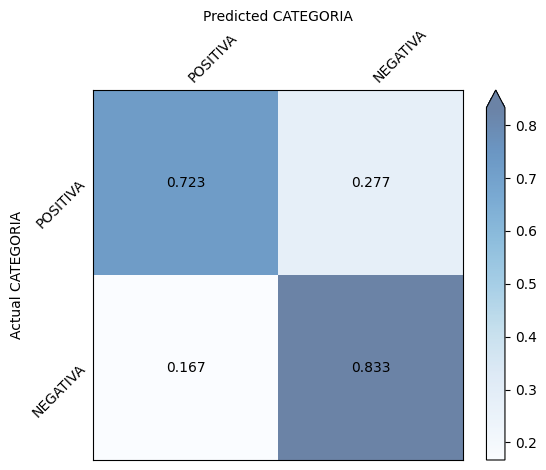

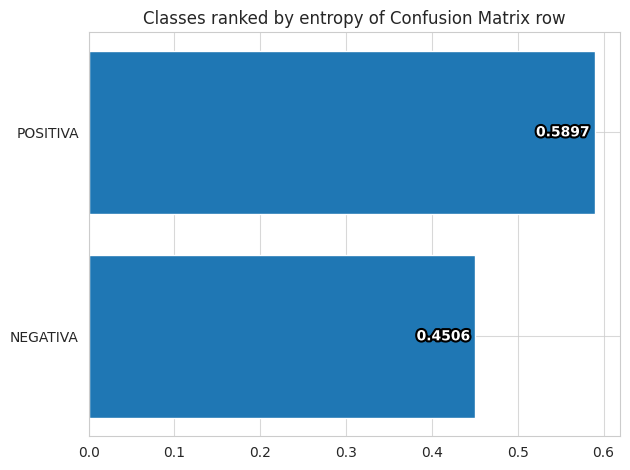

In [46]:
# Visualizes confusion matrix, which gives an overview of classifier performance
# for each class.
from ludwig.visualize import confusion_matrix

confusion_matrix(
  [test_stats],
  model.training_set_metadata,
  'class',
  top_n_classes=[5],
  model_names=[''],
  normalize=True,
)

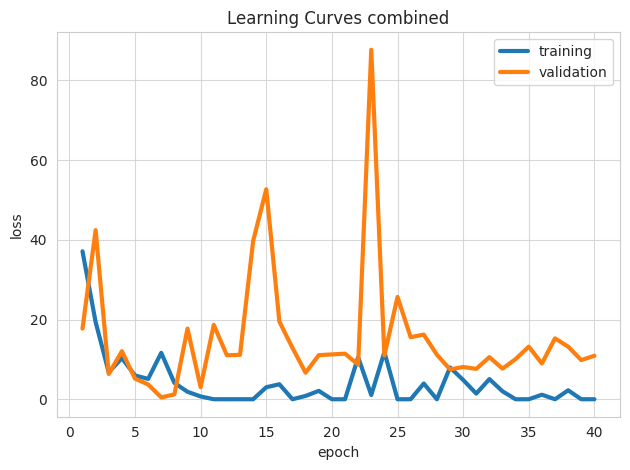

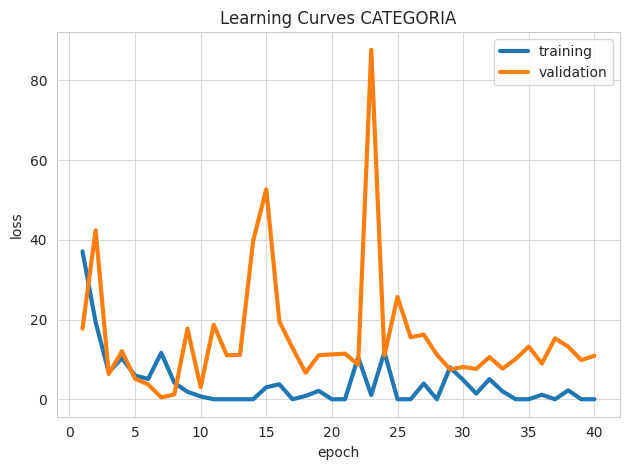

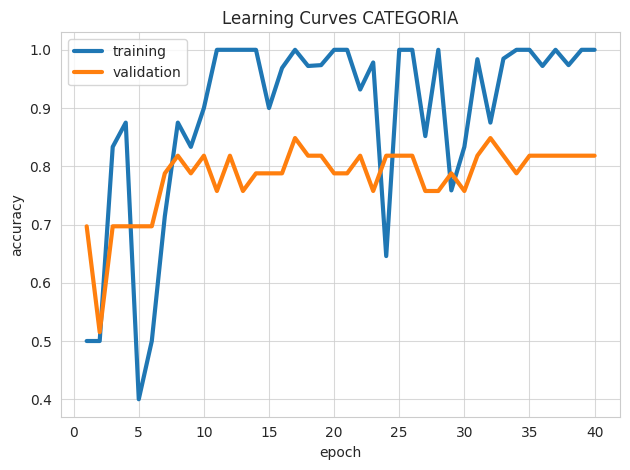

In [47]:
# Visualizes learning curves, which show how performance metrics changed over
# time during training.
from ludwig.visualize import learning_curves

learning_curves(train_stats, output_feature_name='class')

In [48]:
train, valid, test, metadata = pred

In [49]:
# Evaluación del modelo
evaluation_statistics, predictions, output_directory = model.evaluate(test, collect_overall_stats=True)

Evaluation: 100%|██████████| 5/5 [00:00<00:00,  9.22it/s]

INFO:ludwig.models.predictor:
===== CATEGORIA =====
INFO:ludwig.models.predictor:accuracy: 0.8484848737716675


INFO:ludwig.models.predictor:average_precision_macro: 0.7175285284091661
INFO:ludwig.models.predictor:average_precision_micro: 0.7175285284091661
INFO:ludwig.models.predictor:average_precision_samples: 0.7175285284091661
INFO:ludwig.models.predictor:loss: 8.043233871459961
INFO:ludwig.models.predictor:overall_stats: { 'avg_f1_score_macro': 0.8295454545454546,
  'avg_f1_score_micro': 0.8484848484848486,
  'avg_f1_score_weighted': 0.8536501377410468,
  'avg_precision_macro': 0.815609756097561,
  'avg_precision_micro': 0.8484848484848485,
  'avg_precision_weighted': 0.8484848484848485,
  'avg_recall_macro': 0.8622620380739081,
  'avg_recall_micro': 0.8484848484848485,
  'avg_recall_weighted': 0.8484848484848485,
  'kappa_score': 0.662231320368475,
  'token_accuracy': 0.8484848484848485}
INFO:ludwig.models.predictor:per_class_stats: {False: {   'accuracy': 0.8484848484848485,
    'f1_score': 0.8863636363636364,
    'fall_out': 0.10526315789473684,
    'false_discovery_rate': 0.048780487804

In [50]:
from ludwig import visualize

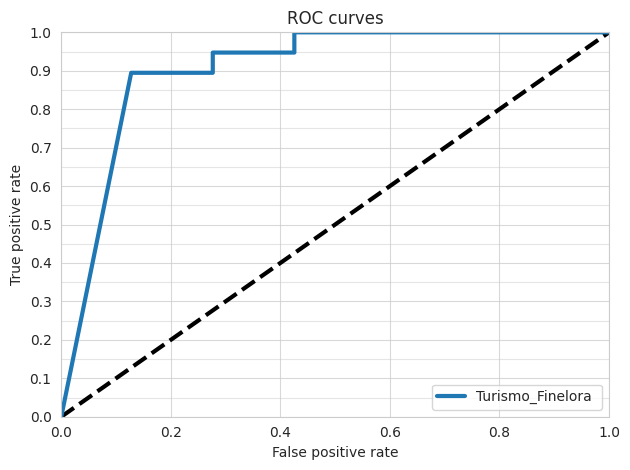

In [51]:
visualize.roc_curves(
    [predictions['CATEGORIA_probabilities']],
    test.to_df()['CATEGORIA_2Xl8CP'],
    test.to_df(),
    'CATEGORIA_2Xl8CP',
    '1',  # 1 positiva
    model_names=["Turismo_Finelora"],
    output_directory='visualization',
    file_format='png'
)

In [52]:
from ludwig import visualize

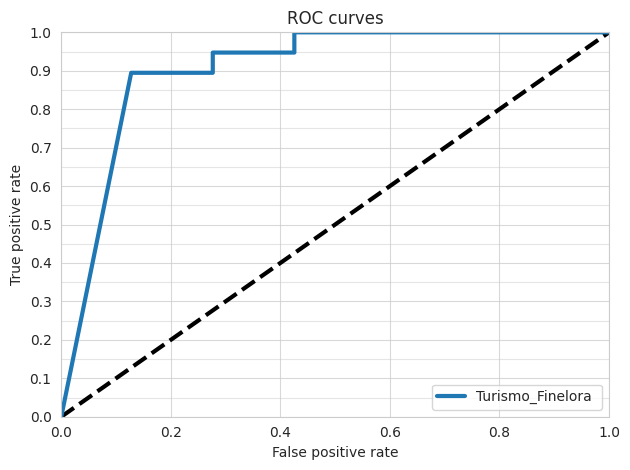

In [53]:
visualize.roc_curves(
    [predictions['CATEGORIA_probabilities']],
    test.to_df()['CATEGORIA_2Xl8CP'],
    test.to_df(),
    'CATEGORIA_2Xl8CP',
    '-1',  # 1 positiva
    model_names=["Turismo_Finelora"],
    output_directory='visualization',
    file_format='png'
)

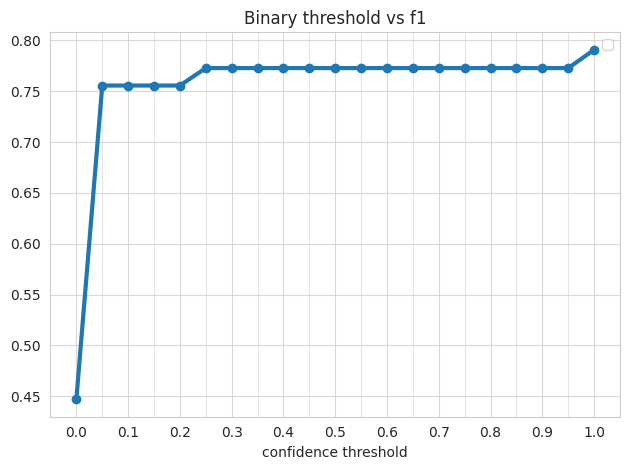

In [54]:
visualize.binary_threshold_vs_metric(
    [predictions['CATEGORIA_probabilities']],
    test.to_df()['CATEGORIA_2Xl8CP'],
    test.to_df(),
    'CATEGORIA_2Xl8CP',
  ['f1'],# solo hacerlo con F1 para la calibracion
  -1
)

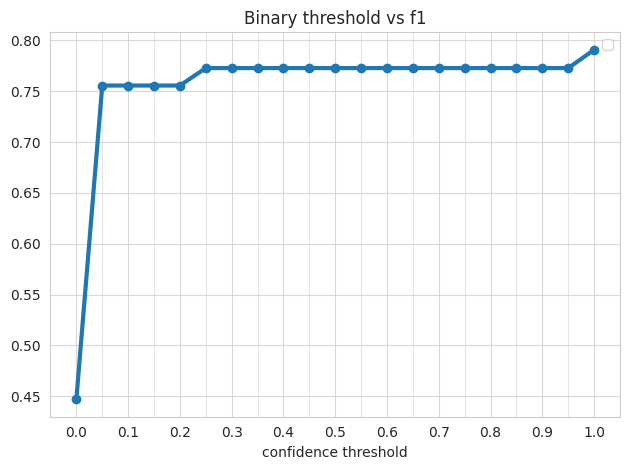

In [55]:
visualize.binary_threshold_vs_metric(
    [predictions['CATEGORIA_probabilities']],
    test.to_df()['CATEGORIA_2Xl8CP'],
    test.to_df(),
    'CATEGORIA_2Xl8CP',
  ['f1'],# solo hacerlo con F1 para la calibracion
  1
)

In [59]:
import pandas as pd

# Crear un DataFrame con las descripciones de noticias de turismo
text_to_predict = pd.DataFrame({
    "DESCRIPCION ": [
        "Cartagena celebra un incremento del 20% en turismo gracias a sus festivales de música y arte, impulsando la economía local.",
        "El Gobierno nacional, a través del Ministerio de Comercio, Industria y Turismo, lanzó Empretur, un programa para entregar estímulos e incentivos al sector turístico del país",
        "Colombia es nombrada el mejor destino turístico de Sudamérica por su rica cultura y hospitalidad.",
        "El festival de la flores en Medellín se supera en asistencia, con un aumento del 30% en turistas internacionales.",
        "Escándalo por malas prácticas en hoteles de lujo en Bogotá daña gravemente la imagen turística de la ciudad.",
        "Protestas en varias ciudades importantes afectan negativamente la temporada turística, causando una caída en las reservas.",
        "Informes de inseguridad en Cartagena disuaden a los turistas de visitar, afectando la industria hotelera local.",
        "Desastres naturales en la costa caribeña golpean la industria del turismo, con hoteles y playas cerradas durante meses.",
        "Controversia por la construcción de un nuevo aeropuerto en Barranquilla amenaza zonas ecológicas y despierta críticas de grupos ambientalistas."
    ]
})

# Utilizar el DataFrame para hacer predicciones
predictions, output_directory = model.predict(text_to_predict)

# Ver las predicciones
print(predictions)

INFO:ludwig.utils.tokenizers:Loaded TorchText implementation of distilbert/distilbert-base-multilingual-cased tokenizer


Prediction: 100%|██████████| 1/1 [00:00<00:00, 11.16it/s]

INFO:ludwig.api:Finished predicting in: 1.72s.



                       CATEGORIA_probabilities CATEGORIA_predictions  \
0  [0.9995595719665289, 0.0004404280334711075]              POSITIVA   
1  [0.9999995295574422, 4.704425577983784e-07]              POSITIVA   
2  [0.9999224627026706, 7.753729732939973e-05]              POSITIVA   
3                                   [0.0, 1.0]              NEGATIVA   
4                                   [0.0, 1.0]              NEGATIVA   
5                                   [0.0, 1.0]              NEGATIVA   
6                                   [0.0, 1.0]              NEGATIVA   
7                                   [0.0, 1.0]              NEGATIVA   
8  [0.0006096363067626953, 0.9993903636932373]              NEGATIVA   

   CATEGORIA_probabilities_POSITIVA  CATEGORIA_probabilities_NEGATIVA  \
0                          0.999560                      4.404280e-04   
1                          1.000000                      4.704426e-07   
2                          0.999922                      7.

In [ ]:
model.save('/content/drive/MyDrive/Tesis/Collabs_finales_Experimentos_nuevo/model')

In [ ]:
model.save_torchscript(
  '/content/drive/MyDrive/Tesis/Collabs_finales_Experimentos_nuevo/model',device="cuda")

INFO:ludwig.utils.tokenizers:Loaded TorchText implementation of distilbert/distilbert-base-multilingual-cased tokenizer
/usr/local/lib/python3.10/dist-packages/transformers/modeling_utils.py:4481: FutureWarning: `_is_quantized_training_enabled` is going to be deprecated in transformers 4.39.0. Please use `model.hf_quantizer.is_trainable` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/models/distilbert/modeling_distilbert.py:231: TracerWarning: torch.tensor results are registered as constants in the trace. You can safely ignore this warning if you use this function to create tensors out of constant variables that would be the same every time you call this function. In any other case, this might cause the trace to be incorrect.
  mask, torch.tensor(torch.finfo(scores.dtype).min)
INFO:ludwig.models.inference:Saved torchscript module for preprocessor to inference_preprocessor.pt.
INFO:ludwig.models.inference:Saved torchscript module for predictor to inference

In [4]:
from ludwig.models.inference import InferenceModule
inference_module=InferenceModule.from_directory('/content/drive/MyDrive/Tesis/Collabs_finales_Experimentos_nuevo/model/')

Loaded torchscript module for preprocessor from inference_preprocessor.pt.
Loaded torchscript module for predictor from inference_predictor-cuda.pt.
Loaded torchscript module for postprocessor from inference_postprocessor.pt.


In [60]:
raw={"DESCRIPCION ":[
    "El Gobierno nacional, a través del Ministerio de Comercio, Industria y Turismo, lanzó Empretur, un programa para entregar estímulos e incentivos al sector turístico del país",

    ]
}

In [6]:
preprocessed_data=inference_module.preprocessor_forward(raw)

In [7]:
predictions=inference_module.predictor_forward(preprocessed_data)


In [8]:
postprocessed_data=inference_module.postprocessor_forward(predictions)

In [9]:
postprocessed_data

{'CATEGORIA': {'predictions': ['NEGATIVA'],
  'probabilities': tensor([[0., 1.]], device='cuda:0')}}

In [10]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 34.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 14.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.3/316.3 kB 41.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.5/142.5 kB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.5/409.5 kB 48.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 71.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 14

In [15]:
'la noticia es: '+ postprocessed_data['CATEGORIA']['predictions'][0]

'la noticia es: NEGATIVA'

In [11]:
import gradio as gr

In [ ]:

#import gradio as gr



#demo = gr.Interface(fn=greet, inputs="textbox", outputs=[gr.Textbox(label="Clasificación")], css="""
  # body {background-color : red}
   # """,)



#if __name__ == "__main__":
    #demo.launch()

In [33]:
def greet(Noticia):
  raw={"DESCRIPCION ":[Noticia]}
  preprocessed_data=inference_module.preprocessor_forward(raw)
  predictions=inference_module.predictor_forward(preprocessed_data)
  postprocessed_data=inference_module.postprocessor_forward(predictions)
  return 'la noticia es: '+ postprocessed_data['CATEGORIA']['predictions'][0]





In [34]:
from __future__ import annotations
from typing import Iterable
import gradio as gr
from gradio.themes.base import Base
from gradio.themes.utils import colors, fonts, sizes
import time


class Seafoam(Base):
    def __init__(
        self,
        *,
        primary_hue: colors.Color | str = colors.blue,
        secondary_hue: colors.Color | str = colors.red,
        neutral_hue: colors.Color | str = colors.gray,
        spacing_size: sizes.Size | str = sizes.spacing_md,
        radius_size: sizes.Size | str = sizes.radius_md,
        text_size: sizes.Size | str = sizes.text_lg,
        font: fonts.Font
        | str
        | Iterable[fonts.Font | str] = (
            fonts.GoogleFont("Quicksand"),
            "ui-sans-serif",
            "sans-serif",
        ),

    ):
        super().__init__(
            primary_hue=primary_hue,
            secondary_hue=secondary_hue,
            neutral_hue=neutral_hue,
            spacing_size=spacing_size,
            radius_size=radius_size,
            text_size=text_size,

        )
        super().set(
            body_background_fill="repeating-linear-gradient(45deg, *primary_200, *primary_200 10px, *primary_50 10px, *primary_50 20px)",
            body_background_fill_dark="repeating-linear-gradient(45deg, *primary_800, *primary_800 10px, *primary_900 10px, *primary_900 20px)",
            button_primary_background_fill="linear-gradient(90deg, *primary_300, *secondary_400)",
            button_primary_background_fill_hover="linear-gradient(90deg, *primary_200, *secondary_300)",
            button_primary_text_color="white",
            button_primary_background_fill_dark="linear-gradient(90deg, *primary_600, *secondary_800)",
            slider_color="*secondary_300",
            slider_color_dark="*secondary_600",
            block_title_text_weight="600",
            block_border_width="3px",
            block_shadow="*shadow_drop_lg",
            button_shadow="*shadow_drop_lg",
            button_large_padding="32px",
        )



seafoam = Seafoam()

with gr.Blocks(theme=seafoam) as demo:
    gr.Interface(fn=greet, inputs="textbox",
                    outputs=[gr.Textbox(label="Clasificación")],

                   )


    with gr.Row():
        button = gr.Button("Clacificador", variant="primary")
        clear = gr.Button("Resultado")




if __name__ == "__main__":
    demo.launch()



Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://585e8a8d1feb0c83f4.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
